In [1]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


# DỰ ĐOÁN SỐ BÀN THẮNG CỦA MỘT TRẬN ĐẤU CỦA EPL VÀ CHAMPIONSHIP

## 1. MỤC ĐÍCH
Dự đoán số bàn thắng của một trận đấu dựa trên các thông tin có sẵn (có test thử khi trận đấu đã diễn ra)

## 2. LƯU Ý
Mô hình không dự đoán chính xác 100%, vì:

- **Yếu tố con người**: Phong độ, trọng tài, tâm lý, bùng nổ của các cá nhân,... là những thứ máy học khó lường trước được. Ví dụ: Những trận trước đội A đã dỡ nhưng trận này thì lại bùng nổ. Trận đấu càng có nhiều biến cố thì càng khó dự đoán chính xác.

- **Đặc điểm giải đấu**:
  - EPL và Championship là 2 giải đấu khá tương đồng về tính cạnh tranh
  - EPL được coi là giải đấu cạnh tranh nhất trong 5 giải đấu hàng đầu và là giải hấp dẫn nhất châu Âu
  - EPL có pressing cao và đa dạng
  - Championship tuy ít pressing và hay bóng dài nhưng có vài đội xuống và lên hạng 2 vẫn mang đặc trưng từ EPL
  - Dù xuống hạng nhưng ở Championship, những đội này vẫn mạnh

## 3. ĐẶC ĐIỂM CẠNH TRANH
- Những trận có nhiều bàn thắng khá ít xảy ra vì:
  - Môi trường cạnh tranh rất cao
  - Đội mạnh có thể bất ngờ thua
  - Trong tích tắc có thể bị ghi bàn nếu không xử lý nhanh
- Mô hình này chưa tối ưu nhất theo cá nhân của mỗi người

### Các bài toán tương tự trong thực tế

Dự đoán số bàn thắng là một nhánh nhỏ trong lĩnh vực phân tích dữ liệu thể thao. Các ứng dụng thực tế tương tự bao gồm:
- Dự đoán kết quả trận đấu (thắng/hòa/thua) cho cá cược thể thao và phân tích chiến thuật.
- Dự đoán tỷ số bóng đá, bóng rổ, bóng chày dựa trên dữ liệu lịch sử.
- Xây dựng hệ thống xếp hạng đội bóng và dự đoán vị trí cuối mùa giải.
- Phân tích hiệu suất cầu thủ (ghi bàn, kiến tạo, phòng ngự).
- Dự đoán các chỉ số khác như số thẻ phạt, số pha dứt điểm, tỷ lệ kiểm soát bóng.

# KẾ HOẠCH DỰ ÁN DỰ ĐOÁN SỐ BÀN THẮNG

## 1. PHASE 1: DỮ LIỆU VÀ XỬ LÝ DỮ LIỆU
### 1.1 Import Thư Viện
- Import các thư viện cần thiết cho dự án

### 1.2 Xử Lý Dữ Liệu Gốc
- Đọc file dữ liệu
- Gộp file dữ liệu
- Xóa các dòng thiếu dữ liệu (sẽ giải thích chi tiết sau)

### 1.3 Chuẩn Bị Dữ Liệu
- Merge các file dữ liệu
- Xử lý dữ liệu trong file

### 1.4 Chia Tập Dữ Liệu
- Chia dữ liệu thành tập train và test

## 2. PHASE 2: PHÁT TRIỂN VÀ ĐÁNH GIÁ MÔ HÌNH
### 2.1 Phát Triển Mô Hình
- Chạy thử mô hình
- Kiểm tra overfitting và underfitting
- Sử dụng cross validation xuyên suốt quá trình train

### 2.2 Kiểm Tra Thực Tế
- Thử nghiệm với dữ liệu thực tế của các trận đã diễn ra
- Sử dụng 1-2 mô hình để kiểm tra

### 2.3 Đa Mô Hình
- Chạy 5 mô hình khác nhau
- Trực quan hóa kết quả

### 2.4 Tối Ưu Hóa
- Sử dụng GridCV để tối ưu hóa 5 mô hình
- Trực quan hóa kết quả tối ưu

## 3. PHASE 3: ĐÁNH GIÁ VÀ KẾT LUẬN
### 3.1 Đánh Giá Mô Hình
- Đánh giá các mô hình
- Kết luận mô hình tối ưu

### 3.2 Kết Hợp Mô Hình
- Sử dụng trung bình có trọng số để kết hợp 5 mô hình
- Đảm bảo kết quả bám sát thực tế
- Trực quan hóa kết quả kết hợp

### 3.3 Kết Luận Tổng Thể
- Kết luận tổng thể dự án
- Đánh giá tính khả thi của giải pháp

### Hoàn cảnh không thể thu thập hoặc lý tưởng để thu thập dữ liệu

Không thể thu thập dữ liệu khi:
- Đội bóng mới thành lập hoặc giải đấu mới, thiếu dữ liệu lịch sử.
- Dữ liệu không được công khai, bị hạn chế bởi bản quyền hoặc chi phí thu thập quá cao.
- Dữ liệu không đầy đủ, thiếu các chỉ số quan trọng như đội hình, chấn thương, thời tiết.
- Trận đấu bị hủy, thay đổi lịch hoặc các yếu tố bất thường khác.

Lý tưởng để thu thập dữ liệu khi:
- Có nguồn dữ liệu chính thống, cập nhật thường xuyên từ các nhà cung cấp uy tín (Opta, StatsBomb, FIFA).
- Dữ liệu được ghi nhận đầy đủ qua nhiều mùa giải, bao gồm cả thông tin chi tiết về trận đấu, cầu thủ, điều kiện thi đấu.
- Dữ liệu được chuẩn hóa, làm sạch, đồng nhất về định dạng và có thể truy xuất tự động (API, file csv chuẩn).

# SO SÁNH 5 MÔ HÌNH DỰ ĐOÁN

## 1. POISSON REGRESSION (POISSON)
### Lý do chọn
- Mô hình Poisson phổ biến trong bài toán đếm (count data)
- Phù hợp cho dữ liệu số bàn thắng trong bóng đá

### Ưu điểm
- Đơn giản, dễ hiểu
- Kết quả có tính lý thuyết cao
- Phù hợp với dữ liệu phân phối Poisson

### Hạn chế
- Không hiệu quả với dữ liệu biến động cao
- Không phù hợp với dữ liệu phức tạp

## 2. RANDOM FOREST (RF)
### Lý do chọn
- Mô hình học máy mạnh mẽ dựa trên cây quyết định
- Xử lý tốt dữ liệu phức tạp
- Tự động xử lý mối quan hệ phi tuyến tính

### Ưu điểm
- Xử lý tốt dữ liệu không đồng nhất
- Tránh overfitting nhờ nhiều cây quyết định
- Hiệu quả với dữ liệu không đồng nhất

### Hạn chế
- Khó xử lý mối quan hệ phức tạp không phải cây quyết định

## 3. XGBOOST
### Lý do chọn
- Mô hình học máy mạnh mẽ, phổ biến trong các cuộc thi
- Thuật toán boosting tối ưu hiệu suất

### Ưu điểm
- Xử lý tốt dữ liệu không đồng đều
- Cải thiện độ chính xác nhờ chọn đặc trưng tốt
- Mạnh với dữ liệu phi tuyến tính

### Hạn chế
- Tốn thời gian huấn luyện
- Yêu cầu tối ưu hóa tham số cẩn thận

## 4. LIGHTGBM
### Lý do chọn
- Mô hình mạnh mẽ và nhanh chóng
- Xử lý tốt dữ liệu lớn và phức tạp
- Phiên bản tối ưu của XGBoost

### Ưu điểm
- Hiệu quả về tốc độ
- Xử lý tốt dữ liệu lớn
- Sử dụng thuật toán histogram-based learning

### Hạn chế
- Yêu cầu nhiều bộ nhớ với dữ liệu lớn

## 5. GRADIENT BOOSTING
### Lý do chọn
- Thuật toán mạnh mẽ kết hợp nhiều cây quyết định
- Tối ưu hóa dự đoán

### Ưu điểm
- Tối ưu hóa cho mọi loại bài toán
- Dễ tinh chỉnh để cải thiện hiệu suất
- Hiệu quả với hồi quy và phân loại

### Hạn chế
- Khó xử lý dữ liệu lớn
- Cần tối ưu tham số tỉ mỉ

# CÁC HÀM SỬ DỤNG TRONG DỰ ÁN

## 1. ĐÁNH GIÁ MÔ HÌNH
### 1.1 MAE (Mean Absolute Error)
- Ý nghĩa: Trung bình của các giá trị tuyệt đối của sai số
- Lý do sử dụng:
  - Dễ hiểu và trực quan: "Dự đoán sai trung bình bao nhiêu đơn vị?"
  - Ít bị ảnh hưởng bởi outliers

### 1.2 MSE (Mean Squared Error)
- Ý nghĩa: Trung bình của bình phương các sai số
- Lý do sử dụng:
  - Nhấn mạnh sai số lớn (do bình phương)
  - Phổ biến trong huấn luyện mô hình
  - Dễ tối ưu

### 1.3 RMSE (Root Mean Squared Error)
- Ý nghĩa: Căn bậc hai của MSE
- Lý do sử dụng:
  - Đơn vị giống biến đầu ra
  - Dễ hiểu hơn MSE
  - Vẫn nhạy cảm với outliers

### 1.4 R² Score
- Ý nghĩa: Tỷ lệ phương sai được giải thích
- Lý do sử dụng:
  - Phạm vi từ -∞ đến 1
  - 1: Mô hình hoàn hảo
  - 0: Tệ như đoán trung bình
  - <0: Tệ hơn đoán trung bình

### 1.5 Cross-Validation
- Ý nghĩa: Đánh giá mô hình qua k-fold cross-validation
- Lý do sử dụng:
  - Khả năng tổng quát cao hơn
  - Đánh giá độ ổn định của mô hình
  - Kết quả đáng tin cậy hơn

## 2. THƯ VIỆN XỬ LÝ DỮ LIỆU
### 2.1 LabelEncoder
- Công dụng: Chuyển đổi nhãn chuỗi thành số nguyên
- Ví dụ: ["cat", "dog", "bird"] → [0, 1, 2]
- Lưu ý: Không phù hợp cho dữ liệu nominal
- Đã thử với Season là League nhưng đã hủy bỏ

### 2.2 StandardScaler
- Công dụng: Chuẩn hóa dữ liệu số
- Ví dụ: [1, 2, 3] → [-1.22, 0, 1.22]
- Lưu ý: Chỉ áp dụng cho dữ liệu số
- Trong dự án này: Do các mô hình sử dụng (Random Forest, XGBoost, LightGBM,...) không yêu cầu dữ liệu phải chuẩn hóa tuyệt đối nên bước này có thể bỏ qua mà không ảnh hưởng nhiều đến hiệu quả mô hình. Nhưng nếu mô hình đã train lưu bằng joblib mà khi thêm vecto vào mà không chuẩn hóa thì có thể ảnh hưởng đến kết quả dự đoán.(xem cuối bài để biết chi tiết)

## 3. THƯ VIỆN CHÍNH
### 3.1 Pandas
- Công dụng: Xử lý dữ liệu bảng
- Tính năng:
  - Đọc/ghi nhiều định dạng
  - Lọc, sắp xếp, nhóm dữ liệu
  - Phân tích dữ liệu EDA

### 3.2 Numpy
- Công dụng: Xử lý mảng số học
- Tính năng:
  - Mảng đa chiều hiệu suất cao
  - Phép toán ma trận
  - Tích hợp với các thư viện khác

### 3.3 Matplotlib & Seaborn
- Công dụng: Trực quan hóa dữ liệu
- Tính năng:
  - Đồ thị đa dạng
  - Phân tích tương quan
  - Phân phối dữ liệu
  - So sánh mô hình
  - Biểu đồ tương tác

### Giải pháp thủ công và cách chuyên gia tiếp cận

Trước khi có các mô hình học máy, dự đoán số bàn thắng thường dựa vào:
- Phân tích thống kê đơn giản: trung bình số bàn thắng các trận gần nhất, hiệu số bàn thắng/thua, lịch sử đối đầu.
- Đánh giá phong độ gần đây của hai đội, lợi thế sân nhà/sân khách, lực lượng ra sân, chấn thương, thẻ phạt.
- Ý kiến chuyên gia: các chuyên gia bóng đá kết hợp dữ liệu, quan sát thực tế, và kinh nghiệm để đưa ra nhận định.

Các chuyên gia phân tích chuyên sâu hơn bằng cách:
- Kết hợp nhiều nguồn dữ liệu: thống kê truyền thống, dữ liệu xG (Expected Goals), phân tích video trận đấu.
- Sử dụng các mô hình xác suất, mô hình Poisson, hoặc các chỉ số nâng cao để tăng độ chính xác.
- Đánh giá các yếu tố tâm lý, động lực thi đấu, lịch thi đấu dày đặc, thay đổi huấn luyện viên, điều kiện thời tiết.

# Đọc file csv england 1 vào

In [2]:
file_path = 'England CSV.csv' #đọc dữ liệu
df = pd.read_csv(file_path) #đọc dữ liệu
print(df.shape)


(9329, 25)


# xem đuôi

In [3]:
df.tail()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
9324,19/08/2000,2000/01,Leicester,Aston Villa,0,0,D,0.0,0.0,D,...,12.0,12.0,5.0,4.0,2.0,3.0,0.0,0.0,20000819,Premier League
9325,19/08/2000,2000/01,Leeds,Everton,2,0,H,2.0,0.0,H,...,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0,20000819,Premier League
9326,19/08/2000,2000/01,Derby,Southampton,2,2,D,1.0,2.0,A,...,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0,20000819,Premier League
9327,19/08/2000,2000/01,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0,20000819,Premier League
9328,19/08/2000,2000/01,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0,20000819,Premier League


# nhận thấy nan/null từ mùa đầu tới 2000 nên tôi muốn xóa dòng có nan/null

# XỬ LÝ DỮ LIỆU THIẾU (NaN/NULL)

## 1. PHÂN TÍCH DỮ LIỆU THIẾU
- Số dòng chứa NaN: khoảng 3000~ dòng
- Tỷ lệ: gần 20% tổng dữ liệu

## 2. ĐÁNH GIÁ CÁC PHƯƠNG PHÁP XỬ LÝ
### 2.1 Điền bằng 0
- Ảnh hưởng đến Poisson Regressor
- Kết quả: 
  - R² Score: 47%
  - MAE cao
  - Hiệu quả kém với tất cả mô hình

### 2.2 Sử dụng trung vị (mean)
- Nhược điểm:
  - Làm bão hòa dữ liệu tổng thể
  - Không phù hợp với mục tiêu chính xác

## 3. QUYẾT ĐỊNH CUỐI CÙNG
- Phương án chọn: Xóa bỏ các dòng chứa NaN/null
- Lý do:
  - Đảm bảo chất lượng dữ liệu
  - Tránh sai lệch trong mô hình
  - Phù hợp với mục tiêu chính xác
  - Ảnh hưởng đến tất cả mô hình, không chỉ Poisson Regressor
- Tuy nhiên, việc xóa đi sẽ mất đi các trận đấu khác nhưng với lượng trận đấu vẫn đủ để huấn luyện mô hình

### Xử lý dữ liệu ngoại lai và nhiễu

Ngoại lai thường xuất hiện khi có các trận đấu với tỷ số bất thường (ví dụ: thắng/thua cách biệt quá lớn, số bàn thắng vượt xa trung bình). Để xử lý:
- Sử dụng biểu đồ boxplot hoặc Z-score để phát hiện giá trị ngoại lai.
- Xem xét loại bỏ hoặc phân tích riêng các trận đấu này nếu chúng không phản ánh đúng thực lực.

Nhiễu có thể đến từ dữ liệu nhập sai, lỗi ghi nhận, hoặc các yếu tố bất thường không lặp lại. Cách xử lý:
- Kiểm tra, xác thực lại dữ liệu với nhiều nguồn khác nhau.
- Làm mịn dữ liệu bằng các phương pháp thống kê (moving average) hoặc loại bỏ các bản ghi không hợp lệ.

In [4]:
# In DataFrame ban đầu để thấy sự khác biệt
print("DataFrame ban đầu:")
print(df)
print("-" * 30)

# Bước 1: Xác định các record cần xóa (displayorder bé hơn 20000819)
threshold = 20000819
mask = df['Display_Order'] < threshold

# Bước 2: Xóa các record này khỏi DataFrame
df_filtered = df[~mask]

# Hoặc, nếu bạn muốn xóa trực tiếp trên DataFrame hiện tại (inplace):
# df.drop(df[mask].index, inplace=True)

# In DataFrame sau khi đã xóa
print(f"DataFrame sau khi xóa các record có displayorder bé hơn {threshold}:")
print(df_filtered)

DataFrame ban đầu:
            Date   Season      HomeTeam                AwayTeam  FTH Goals  \
0     16/01/2025  2024/25  Ipswich Town  Brighton & Hove Albion          0   
1     16/01/2025  2024/25    Man United             Southampton          3   
2     15/01/2025  2024/25       Everton             Aston Villa          0   
3     15/01/2025  2024/25     Leicester          Crystal Palace          0   
4     15/01/2025  2024/25     Newcastle                  Wolves          3   
...          ...      ...           ...                     ...        ...   
9324  19/08/2000  2000/01     Leicester             Aston Villa          0   
9325  19/08/2000  2000/01         Leeds                 Everton          2   
9326  19/08/2000  2000/01         Derby             Southampton          2   
9327  19/08/2000  2000/01      Coventry           Middlesbrough          1   
9328  19/08/2000  2000/01       Chelsea                West Ham          4   

      FTA Goals FT Result  HTH Goals  HTA Go

# ghi đè lại file gốc

In [5]:
# Giả sử DataFrame sau khi đã xóa là df_filtered

# Chỉ định đường dẫn đến file CSV bạn muốn ghi đè
file_path = 'England CSV.csv'  # Thay 'your_file.csv' bằng đường dẫn thực tế đến file của bạn

# Ghi DataFrame đã lọc vào file CSV, ghi đè lên file cũ
df_filtered.to_csv(file_path, index=False, encoding='utf-8')

print(f"DataFrame đã được ghi đè lên file CSV: {file_path}")

DataFrame đã được ghi đè lên file CSV: England CSV.csv


# check lại file epl đã cập nhật chưa

In [6]:
df.tail()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
9324,19/08/2000,2000/01,Leicester,Aston Villa,0,0,D,0.0,0.0,D,...,12.0,12.0,5.0,4.0,2.0,3.0,0.0,0.0,20000819,Premier League
9325,19/08/2000,2000/01,Leeds,Everton,2,0,H,2.0,0.0,H,...,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0,20000819,Premier League
9326,19/08/2000,2000/01,Derby,Southampton,2,2,D,1.0,2.0,A,...,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0,20000819,Premier League
9327,19/08/2000,2000/01,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0,20000819,Premier League
9328,19/08/2000,2000/01,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0,20000819,Premier League


# đọc file championship (england 2)

In [7]:
df2 = pd.read_csv('England 2 CSV.csv') #đọc dữ liệu
print(df2.shape)


(11351, 25)


# check nan/null cả 2 file cùng với trực quan hóa trước khi gộp(sau khi gộp sẽ xử lý)

# england csv.csv

Số lượng NaN trong từng cột:
 Date             0
Season           0
HomeTeam         0
AwayTeam         0
FTH Goals        0
FTA Goals        0
FT Result        0
HTH Goals        0
HTA Goals        0
HT Result        0
Referee          0
H Shots          0
A Shots          0
H SOT            0
A SOT            0
H Fouls          0
A Fouls          0
H Corners        0
A Corners        0
H Yellow         0
A Yellow         0
H Red            0
A Red            0
Display_Order    0
League           0
dtype: int64


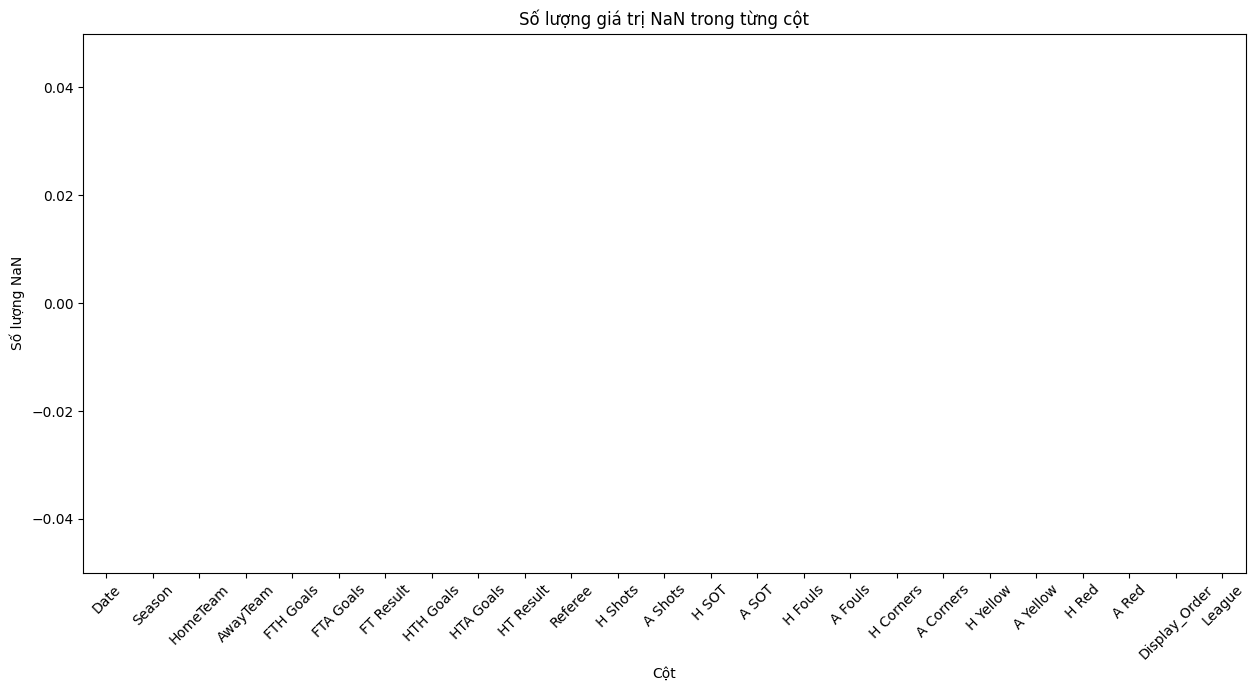

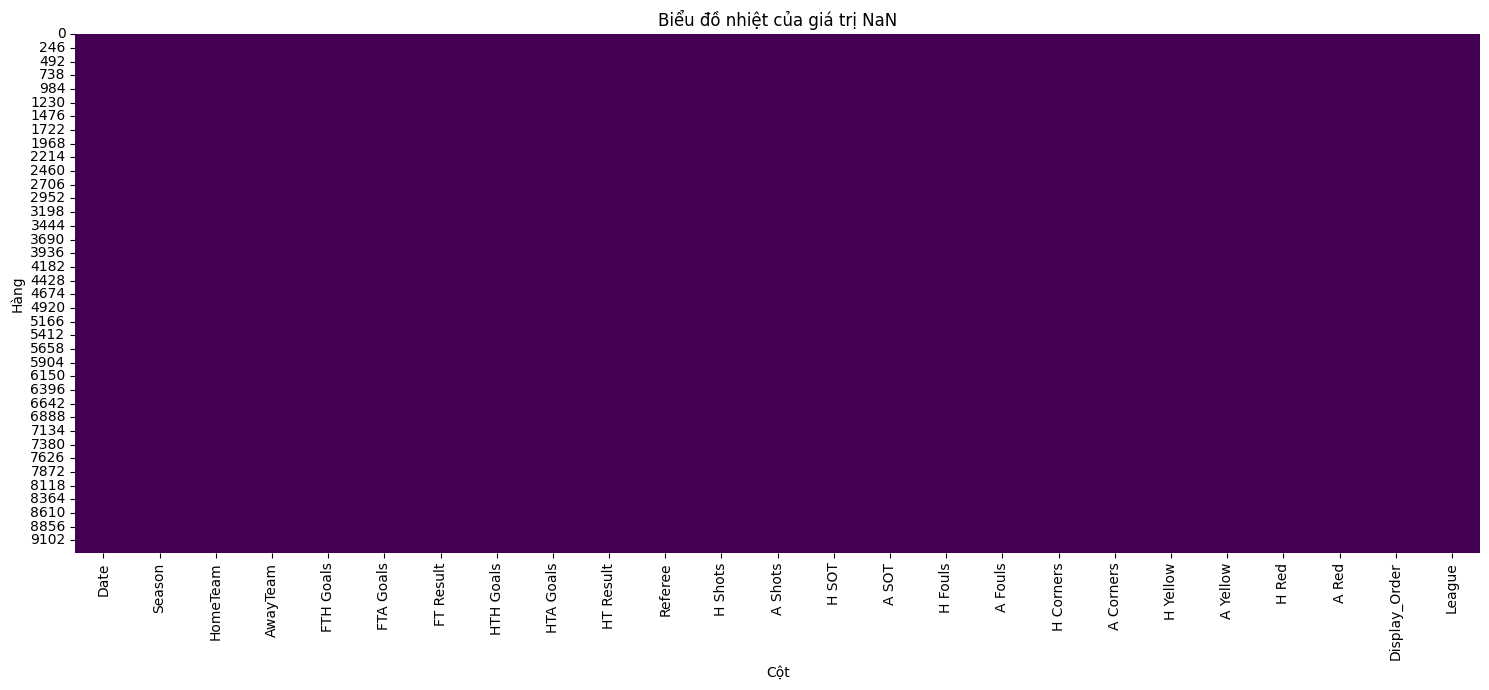

In [8]:
# Giả định bạn có một DataFrame tên là 'df'
# Ví dụ: df = pd.read_csv('ten_file.csv')
# 1. Kiểm tra số lượng NaN trong từng cột
nan_counts = df.isna().sum()
print("Số lượng NaN trong từng cột:\n", nan_counts)

# 2. Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(15, 7))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng giá trị NaN trong từng cột')
plt.xlabel('Cột')
plt.ylabel('Số lượng NaN')
plt.xticks(rotation=45)

# Đặt giá trị nhỏ nhất của trục y là 0
plt.ylim(0, max(nan_counts) * 1.1)  # *1.1 để chừa chỗ cho nhãn số

# Thêm số lên trên các cột, chỉ khi giá trị > 0
for i, value in enumerate(nan_counts):
    if value > 0:  # Chỉ hiển thị nếu số lượng NaN > 0
        ax.text(i, value + 0.1, str(value), ha='center', va='bottom')
# 3. (Tùy chọn) Trực quan hóa bằng heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Biểu đồ nhiệt của giá trị NaN')
plt.xlabel('Cột')
plt.ylabel('Hàng')
plt.tight_layout()
plt.show()

# file england 2 csv.csv

Số lượng NaN trong từng cột:
 Date               0
Season             0
HomeTeam           0
AwayTeam           0
FTH Goals          0
FTA Goals          0
FT Result          0
HTH Goals          1
HTA Goals          1
HT Result          1
Referee          553
H Shots            1
A Shots            1
H SOT              1
A SOT              1
H Fouls            1
A Fouls            1
H Corners          1
A Corners          1
H Yellow           1
A Yellow           1
H Red              1
A Red              1
Display_Order      0
League             0
dtype: int64


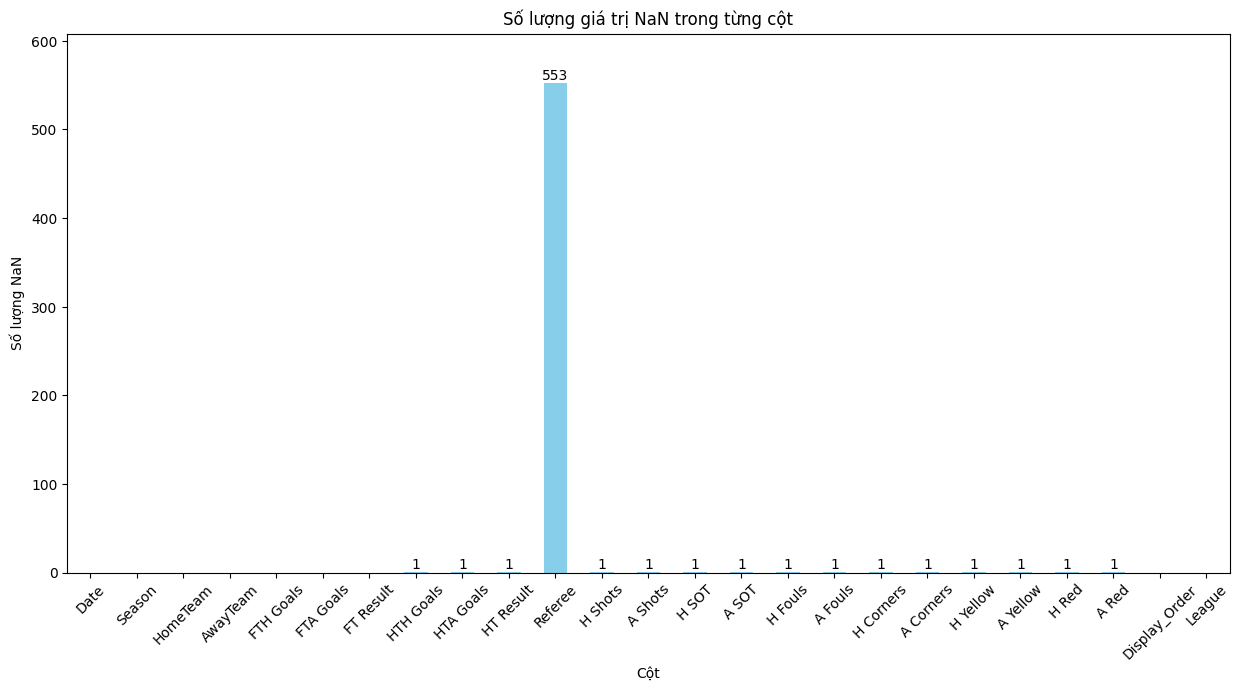

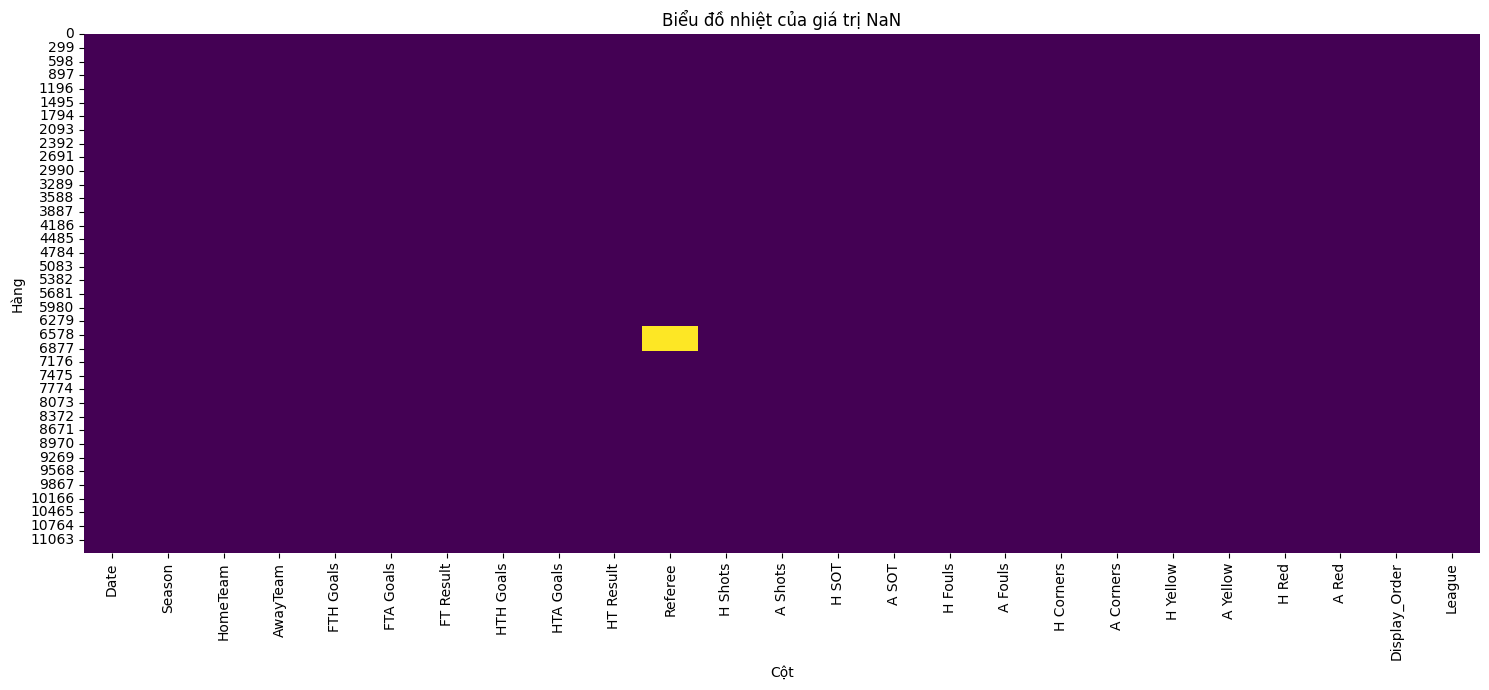

In [9]:
# Giả định bạn có một DataFrame tên là 'df'
# Ví dụ: df = pd.read_csv('ten_file.csv')
# 1. Kiểm tra số lượng NaN trong từng cột
nan_counts = df2.isna().sum()
print("Số lượng NaN trong từng cột:\n", nan_counts)

# 2. Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(15, 7))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng giá trị NaN trong từng cột')
plt.xlabel('Cột')
plt.ylabel('Số lượng NaN')
plt.xticks(rotation=45)

# Đặt giá trị nhỏ nhất của trục y là 0
plt.ylim(0, max(nan_counts) * 1.1)  # *1.1 để chừa chỗ cho nhãn số

# Thêm số lên trên các cột, chỉ khi giá trị > 0
for i, value in enumerate(nan_counts):
    if value > 0:  # Chỉ hiển thị nếu số lượng NaN > 0
        ax.text(i, value + 0.1, str(value), ha='center', va='bottom')
# 3. (Tùy chọn) Trực quan hóa bằng heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df2.isna(), cbar=False, cmap='viridis')
plt.title('Biểu đồ nhiệt của giá trị NaN')
plt.xlabel('Cột')
plt.ylabel('Hàng')
plt.tight_layout()
plt.show()

# Nhận xét:

## England:
- File sau khi cắt phần giá trị NaN từ mùa 92 tới 99/00 thì đã không còn NaN/null, gần như đã sẵn sàng cho features engineer.

## England 2:
- File đọc được có vài cột như H fouls có 1 NaN và referee tới tận 577 NaN, còn lại không vấn đề.

# Nguyên nhân:

Có thể là cùng nguyên nhân với file England CSV. Theo tôi, ba nguyên nhân chính là:

1. Lỗi hoặc thiếu sót trong quá trình thu thập dữ liệu: Do đang chuyển sang cơ sở dữ liệu số hóa.
2. Thiếu thông tin trong nguồn dữ liệu lịch sử.
3. Đặc điểm của giải đấu hoặc dữ liệu: Có thể sẽ không được ghi, đặc biệt là từ hai nguyên nhân trên và trận đấu ít được chú ý nên họ cũng ít ghi.

# Hành động:

## England CSV:
- Bỏ luôn dòng có chứa NaN/null vì trước đó đã kiểm tra có nhiều cột thiếu, sẽ mất thời gian thu thập nên bỏ dòng luôn.

## England 2 CSV:
- Sau khi gộp hai file sẽ xử lý sau.

# gộp file lại

In [10]:
df_merged = pd.concat([df, df2], ignore_index=True)
df_merged.to_csv('df_merged.csv', index=False)

# gộp 2 file lại
# nhận xét: cả 2 file đều chung tên cột và đã xử lý kiểu dữ liệu nên dễ dàng gộp

# kiểm tra dữ liệu file mới

In [11]:
df3 = pd.read_csv('df_merged.csv')
print(df3.shape)

(20680, 25)


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20680 entries, 0 to 20679
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           20680 non-null  object 
 1   Season         20680 non-null  object 
 2   HomeTeam       20680 non-null  object 
 3   AwayTeam       20680 non-null  object 
 4   FTH Goals      20680 non-null  int64  
 5   FTA Goals      20680 non-null  int64  
 6   FT Result      20680 non-null  object 
 7   HTH Goals      20679 non-null  float64
 8   HTA Goals      20679 non-null  float64
 9   HT Result      20679 non-null  object 
 10  Referee        20127 non-null  object 
 11  H Shots        20679 non-null  float64
 12  A Shots        20679 non-null  float64
 13  H SOT          20679 non-null  float64
 14  A SOT          20679 non-null  float64
 15  H Fouls        20679 non-null  float64
 16  A Fouls        20679 non-null  float64
 17  H Corners      20679 non-null  float64
 18  A Corn

# GIẢI THÍCH CÁC CỘT DỮ LIỆU

## 1. THÔNG TIN CHUNG
- **Date**: Ngày diễn ra trận đấu
- **Season**: Mùa giải (ví dụ: 2023/2024)
- **League**: Giải đấu (Premier League, La Liga, v.v.)
- **Display_Order**: Thứ tự hiển thị của trận đấu

## 2. THÔNG TIN ĐỘI BÓNG
- **HomeTeam**: Đội chủ nhà
- **AwayTeam**: Đội khách
- **Referee**: Trọng tài điều khiển trận đấu

## 3. KẾT QUẢ TRẬN ĐẤU
### 3.1 Toàn Trận (Full-Time)
- **FTH Goals**: Số bàn thắng đội chủ nhà
- **FTA Goals**: Số bàn thắng đội khách
- **FT Result**: Kết quả trận đấu (H: thắng, A: thua, D: hòa)

### 3.2 Hiệp 1 (Half-Time)
- **HTH Goals**: Số bàn thắng đội chủ nhà
- **HTA Goals**: Số bàn thắng đội khách
- **HT Result**: Kết quả hiệp 1 (H, A, D)

## 4. THỐNG KÊ SỨC MẠNH
### 4.1 Cú Sút
- **H Shots**: Số cú sút đội chủ nhà
- **A Shots**: Số cú sút đội khách
- **H SOT**: Số cú sút trúng đích đội chủ nhà
- **A SOT**: Số cú sút trúng đích đội khách

### 4.2 Phạt Góc
- **H Corners**: Số phạt góc đội chủ nhà
- **A Corners**: Số phạt góc đội khách

### 4.3 Phạm Lỗi
- **H Fouls**: Số phạm lỗi đội chủ nhà
- **A Fouls**: Số phạm lỗi đội khách

## 5. THẺ PHẠT
- **H Yellow**: Số thẻ vàng đội chủ nhà
- **A Yellow**: Số thẻ vàng đội khách
- **H Red**: Số thẻ đỏ đội chủ nhà
- **A Red**: Số thẻ đỏ đội khách

In [13]:
print(df3.dtypes)

Date              object
Season            object
HomeTeam          object
AwayTeam          object
FTH Goals          int64
FTA Goals          int64
FT Result         object
HTH Goals        float64
HTA Goals        float64
HT Result         object
Referee           object
H Shots          float64
A Shots          float64
H SOT            float64
A SOT            float64
H Fouls          float64
A Fouls          float64
H Corners        float64
A Corners        float64
H Yellow         float64
A Yellow         float64
H Red            float64
A Red            float64
Display_Order      int64
League            object
dtype: object


# PHÂN TÍCH CHUYỂN ĐỔI KIỂU DỮ LIỆU

## 1. CỘT NGÀY THÁNG
- **Date (object → datetime64)**
  - Lý do: Dễ xử lý phép tính thời gian
  - Cách thực hiện: `pd.to_datetime(df['Date'])`

## 2. CỘT MÙA GIẢI
- **Season (object → string/categorical)**
  - Lý do: Chuỗi như "2023/2024"
  - Đề xuất: Chuyển thành string/category

## 3. CỘT ĐỘI BÓNG
- **HomeTeam, AwayTeam (object → string/categorical)**
  - Lý do: Tên đội bóng là chuỗi
  - Đề xuất: Chuyển thành category

## 4. CỘT BÀN THẮNG
- **FTH Goals, FTA Goals (int64)**
  - Lý do: Số nguyên, int64 phù hợp
  - Đề xuất: Giữ nguyên

## 5. CỘT KẾT QUẢ
- **FT Result (object → category)**
  - Lý do: 3 giá trị: "H", "A", "D"
  - Đề xuất: Chuyển thành category

## 6. CỘT HIỆP 1
- **HTH Goals, HTA Goals (float64 → int64/Int64)**
  - Lý do: Số nguyên, không thập phân
  - Đề xuất: Chuyển thành int64/Int64

- **HT Result (object → category)**
  - Lý do: Tương tự FT Result
  - Đề xuất: Chuyển thành category

## 7. CỘT TRỌNG TÀI
- **Referee (object → string/categorical)**
  - Lý do: Tên trọng tài là chuỗi
  - Đề xuất: Chuyển thành category

## 8. CỘT THỐNG KÊ
- **H Shots, A Shots, H SOT, A SOT, H Fouls, A Fouls, H Corners, A Corners, H Yellow, A Yellow, H Red, A Red (float64 → int64/Int64)**
  - Lý do: Số nguyên, không thập phân
  - Đề xuất: Chuyển thành int64/Int64

## 9. CỘT HIỂN THỊ
- **Display_Order (int64)**
  - Lý do: Số nguyên, int64 phù hợp
  - Đề xuất: Giữ nguyên

## 10. CỘT GIẢI ĐẤU
- **League (object → string/categorical)**
  - Lý do: Tên giải đấu là chuỗi
  - Đề xuất: Chuyển thành category

## LƯU Ý CHUNG
- Sử dụng Int64 thay vì int64 nếu có NaN
- Category giúp tiết kiệm bộ nhớ và tăng hiệu suất
- Giữ nguyên kiểu nếu không cần tối ưu

In [14]:

# Giả sử df là DataFrame chứa dữ liệu
# Chuyển đổi kiểu dữ liệu
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Season'] = df3['Season'].astype('string')
df3['HomeTeam'] = df3['HomeTeam'].astype('category')
df3['AwayTeam'] = df3['AwayTeam'].astype('category')
df3['FT Result'] = df3['FT Result'].astype('category')
df3['HT Result'] = df3['HT Result'].astype('category')
df3['Referee'] = df3['Referee'].astype('category')
df3['League'] = df3['League'].astype('category')

# Chuyển các cột float64 thành int64 (hoặc Int64 nếu có NaN)
int_columns = ['HTH Goals', 'HTA Goals', 'H Shots', 'A Shots', 'H SOT', 'A SOT',
               'H Fouls', 'A Fouls', 'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red']
for col in int_columns:
    df3[col] = df3[col].astype('Int64')  # Dùng Int64 để xử lý NaN, hoặc 'int64' nếu chắc chắn không có NaN

# Kiểm tra lại kiểu dữ liệu
print(df3.dtypes)

Date             datetime64[ns]
Season           string[python]
HomeTeam               category
AwayTeam               category
FTH Goals                 int64
FTA Goals                 int64
FT Result              category
HTH Goals                 Int64
HTA Goals                 Int64
HT Result              category
Referee                category
H Shots                   Int64
A Shots                   Int64
H SOT                     Int64
A SOT                     Int64
H Fouls                   Int64
A Fouls                   Int64
H Corners                 Int64
A Corners                 Int64
H Yellow                  Int64
A Yellow                  Int64
H Red                     Int64
A Red                     Int64
Display_Order             int64
League                 category
dtype: object


# kiểm tra null và Nan

In [15]:
df3.isnull().sum()

Date               0
Season             0
HomeTeam           0
AwayTeam           0
FTH Goals          0
FTA Goals          0
FT Result          0
HTH Goals          1
HTA Goals          1
HT Result          1
Referee          553
H Shots            1
A Shots            1
H SOT              1
A SOT              1
H Fouls            1
A Fouls            1
H Corners          1
A Corners          1
H Yellow           1
A Yellow           1
H Red              1
A Red              1
Display_Order      0
League             0
dtype: int64

In [16]:
df3.isna().sum()

Date               0
Season             0
HomeTeam           0
AwayTeam           0
FTH Goals          0
FTA Goals          0
FT Result          0
HTH Goals          1
HTA Goals          1
HT Result          1
Referee          553
H Shots            1
A Shots            1
H SOT              1
A SOT              1
H Fouls            1
A Fouls            1
H Corners          1
A Corners          1
H Yellow           1
A Yellow           1
H Red              1
A Red              1
Display_Order      0
League             0
dtype: int64

# các cột có chứa nan/null là từ file england 2 csv sau bước features engineer thì sẽ xử lý

# KẾT QUẢ FEATURE ENGINEERING

## 1. ĐÁNH GIÁ CÁC CỘT ĐÃ THỬ
- LabelEncoder cho Season và League: Hiệu quả thấp
- Nhiều cột engineer không đóng góp nhiều cho mô hình

## 2. CÁC CỘT ĐẶC TRƯNG CHỌN LỌC

### 2.1 TỶ LỆ CHUYỂN HÓA CƠ HỘI
- **H_Goal_Conversion**: Tỷ lệ chuyển hóa cơ hội đội chủ nhà
  - Công thức: FTHG / HST nếu HST > 0, ngược lại 0
  - Ý nghĩa: Hiệu quả ghi bàn từ cú sút trúng đích
  - Dữ liệu cần: FTHG, HST

- **A_Goal_Conversion**: Tỷ lệ chuyển hóa cơ hội đội khách
  - Công thức: FTAG / AST nếu AST > 0, ngược lại 0
  - Ý nghĩa: Hiệu quả ghi bàn từ cú sút trúng đích
  - Dữ liệu cần: FTAG, AST

### 2.2 DỰ ĐOÁN BÀN THẮNG KỲ VỌNG
- **Expected_Goals_Home**: Dự đoán bàn thắng kỳ vọng đội chủ nhà
  - Công thức: 0.3 * HST + 0.1 * HC
  - Ý nghĩa: Ước lượng bàn thắng dựa trên sút trúng đích và phạt góc
  - Dữ liệu cần: HST, HC

- **Expected_Goals_Away**: Dự đoán bàn thắng kỳ vọng đội khách
  - Công thức: 0.3 * AST + 0.1 * AC
  - Ý nghĩa: Ước lượng bàn thắng dựa trên sút trúng đích và phạt góc
  - Dữ liệu cần: AST, AC

### 2.3 HIỆU QUẢ SÚT BÓNG
- **H_Shot_Efficiency**: Hiệu quả sút bóng đội chủ nhà
  - Công thức: HST / HS nếu HS > 0, ngược lại 0
  - Ý nghĩa: Tỷ lệ sút trúng đích trên tổng số sút
  - Dữ liệu cần: HST, HS

- **A_Shot_Efficiency**: Hiệu quả sút bóng đội khách
  - Công thức: AST / AS nếu AS > 0, ngược lại 0
  - Ý nghĩa: Tỷ lệ sút trúng đích trên tổng số sút
  - Dữ liệu cần: AST, AS

### 2.4 CƯỜNG ĐỘ TRẬN ĐẤU
- **Match_Intensity**: Cường độ tổng thể trận đấu
  - Công thức: H_Attack_Intensity + A_Attack_Intensity
  - Ý nghĩa: Tổng hợp cường độ tấn công của cả hai đội
  - Dữ liệu cần: H_Attack_Intensity, A_Attack_Intensity

### 2.5 TRUNG BÌNH 5 TRẬN GẦN NHẤT
- **H_Avg_Corners_Last5**: Trung bình phạt góc đội chủ nhà
  - Công thức: Trung bình HC trong 5 trận gần nhất
  - Ý nghĩa: Xu hướng tạo phạt góc
  - Dữ liệu cần: HC, HomeTeam

- **A_Avg_Goals_Last5**: Trung bình bàn thắng đội khách
  - Công thức: Trung bình FTAG trong 5 trận gần nhất
  - Ý nghĩa: Phong độ ghi bàn
  - Dữ liệu cần: FTAG, AwayTeam

- **H_Avg_Goals_Last5**: Trung bình bàn thắng đội chủ nhà
  - Công thức: Trung bình FTHG trong 5 trận gần nhất
  - Ý nghĩa: Phong độ ghi bàn
  - Dữ liệu cần: FTHG, HomeTeam

- **A_Avg_Corners_Last5**: Trung bình phạt góc đội khách
  - Công thức: Trung bình AC trong 5 trận gần nhất
  - Ý nghĩa: Xu hướng tạo phạt góc
  - Dữ liệu cần: AC, AwayTeam

### 2.6 CƯỜNG ĐỘ TẤN CÔNG
- **A_Attack_Intensity**: Cường độ tấn công đội khách
  - Công thức: AS + AST + AC
  - Ý nghĩa: Tổng hợp chỉ số tấn công
  - Dữ liệu cần: AS, AST, AC

- **H_Attack_Intensity**: Cường độ tấn công đội chủ nhà
  - Công thức: HS + HST + HC
  - Ý nghĩa: Tổng hợp chỉ số tấn công
  - Dữ liệu cần: HS, HST, HC

## 3. XỬ LÝ DỮ LIỆU THIẾU
- Tổng null/nan không quá lớn
- Phương pháp xử lý: Thay bằng 0
- Lý do: Tổng null/nan nhỏ, không ảnh hưởng nhiều đến mô hình

## 4. ĐÁNH GIÁ TỔNG QUAN
- Các cột được chọn là kết quả của quá trình thử nghiệm nhiều lần
- Tập trung vào các đặc trưng có ý nghĩa thực tế
- Đảm bảo tính tổng quát và đa dạng trong dữ liệu
- Loại bỏ các cột không đóng góp nhiều cho mô hình

In [17]:


# Kiểm tra các hàng có NaN/null để xác định nếu chúng nằm trong cùng một hàng
columns_to_check = ['FTH Goals', 'FTA Goals', 'H SOT', 'A SOT', 'H Shots', 'A Shots', 
                    'H Corners', 'A Corners']
nan_rows = df3[columns_to_check].isna().any(axis=1)
print("Các hàng có NaN/null trong các cột đầu vào:\n", df3[nan_rows][columns_to_check])

# Xử lý NaN/null
# Thay NaN/null bằng 0 cho các cột số nguyên hoặc số thực
numeric_columns = ['FTH Goals', 'FTA Goals', 'H SOT', 'A SOT', 'H Shots', 'A Shots', 
                   'H Corners', 'A Corners']
for col in numeric_columns:
    df3[col] = df3[col].fillna(0)

# Kiểm tra lại số lượng NaN/null trong các cột đầu vào
print("\nSố lượng NaN sau xử lý trong các cột đầu vào:\n", df3[numeric_columns].isna().sum())

# Đảm bảo cột Date ở định dạng datetime và sắp xếp theo thời gian
df3['Date'] = pd.to_datetime(df3['Date'])
df3 = df3.sort_values(by=['Date', 'HomeTeam', 'AwayTeam'])

# Tính toán các cột đặc trưng
# 1. H_Goal_Conversion
df3['H_Goal_Conversion'] = np.where(df3['H SOT'] > 0, df3['FTH Goals'] / df3['H SOT'], 0)

# 2. A_Goal_Conversion
df3['A_Goal_Conversion'] = np.where(df3['A SOT'] > 0, df3['FTA Goals'] / df3['A SOT'], 0)

# 3. Expected_Goals_Home
df3['Expected_Goals_Home'] = 0.3 * df3['H SOT'] + 0.1 * df3['H Corners']

# 4. Expected_Goals_Away
df3['Expected_Goals_Away'] = 0.3 * df3['A SOT'] + 0.1 * df3['A Corners']

# 5. H_Shot_Efficiency
df3['H_Shot_Efficiency'] = np.where(df3['H Shots'] > 0, df3['H SOT'] / df3['H Shots'], 0)

# 6. A_Shot_Efficiency
df3['A_Shot_Efficiency'] = np.where(df3['A Shots'] > 0, df3['A SOT'] / df3['A Shots'], 0)

# 7. H_Attack_Intensity
df3['H_Attack_Intensity'] = df3['H Shots'] + df3['H SOT'] + df3['H Corners']

# 8. A_Attack_Intensity
df3['A_Attack_Intensity'] = df3['A Shots'] + df3['A SOT'] + df3['A Corners']

# 9. Match_Intensity
df3['Match_Intensity'] = df3['H_Attack_Intensity'] + df3['A_Attack_Intensity']

# 10. H_Avg_Goals_Last5
df3['H_Avg_Goals_Last5'] = df3.groupby('HomeTeam')['FTH Goals'].transform(
    lambda x: x.shift(1).rolling(window=5, min_periods=1).mean()
)

# 11. A_Avg_Goals_Last5
df3['A_Avg_Goals_Last5'] = df3.groupby('AwayTeam')['FTA Goals'].transform(
    lambda x: x.shift(1).rolling(window=5, min_periods=1).mean()
)

# 12. H_Avg_Corners_Last5
df3['H_Avg_Corners_Last5'] = df3.groupby('HomeTeam')['H Corners'].transform(
    lambda x: x.shift(1).rolling(window=5, min_periods=1).mean()
)

# 13. A_Avg_Corners_Last5
df3['A_Avg_Corners_Last5'] = df3.groupby('AwayTeam')['A Corners'].transform(
    lambda x: x.shift(1).rolling(window=5, min_periods=1).mean()
)
# Calculate Total_Goals as the sum of FTH Goals and FTA Goals
df3['Total_Goals'] = df3['FTH Goals'] + df3['FTA Goals']
# Kiểm tra NaN trong các cột vừa tính
calculated_columns = [
    'H_Goal_Conversion', 'A_Goal_Conversion', 'Expected_Goals_Home', 'Expected_Goals_Away',
    'H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Attack_Intensity', 'A_Attack_Intensity',
    'Match_Intensity', 'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'H_Avg_Corners_Last5',
    'A_Avg_Corners_Last5'
]
print("\nSố lượng NaN trong các cột đã tính:\n", df3[calculated_columns].isna().sum())

# Thay NaN bằng 0 trong các cột vừa tính (nếu có)
for col in calculated_columns:
    df3[col] = df3[col].fillna(0)

# Kiểm tra lại lần cuối
print("\nSố lượng NaN sau khi xử lý lần cuối:\n", df3[calculated_columns].isna().sum())

# Xem kết quả
print("\nKết quả 5 dòng đầu tiên:\n", df3[[
    'Date', 'HomeTeam', 'AwayTeam', 'H_Goal_Conversion', 'A_Goal_Conversion', 
    'Expected_Goals_Home', 'Expected_Goals_Away', 'H_Shot_Efficiency', 
    'A_Shot_Efficiency', 'Match_Intensity', 'H_Avg_Corners_Last5', 
    'A_Avg_Goals_Last5', 'H_Avg_Goals_Last5', 'A_Avg_Corners_Last5', 
    'A_Attack_Intensity', 'H_Attack_Intensity'
]].head())

Các hàng có NaN/null trong các cột đầu vào:
        FTH Goals  FTA Goals  H SOT  A SOT  H Shots  A Shots  H Corners  \
12416          0          1   <NA>   <NA>     <NA>     <NA>       <NA>   

       A Corners  
12416       <NA>  

Số lượng NaN sau xử lý trong các cột đầu vào:
 FTH Goals    0
FTA Goals    0
H SOT        0
A SOT        0
H Shots      0
A Shots      0
H Corners    0
A Corners    0
dtype: int64

Số lượng NaN trong các cột đã tính:
 H_Goal_Conversion       0
A_Goal_Conversion       0
Expected_Goals_Home     0
Expected_Goals_Away     0
H_Shot_Efficiency       0
A_Shot_Efficiency       0
H_Attack_Intensity      0
A_Attack_Intensity      0
Match_Intensity         0
H_Avg_Goals_Last5      67
A_Avg_Goals_Last5      67
H_Avg_Corners_Last5    67
A_Avg_Corners_Last5    67
dtype: int64

Số lượng NaN sau khi xử lý lần cuối:
 H_Goal_Conversion      0
A_Goal_Conversion      0
Expected_Goals_Home    0
Expected_Goals_Away    0
H_Shot_Efficiency      0
A_Shot_Efficiency      0
H_Attack_

In [18]:
# Check the total number of NaN values in the dataset
total_nan = df3.isna().sum().sum()
print(f"Total NaN values in the dataset: {total_nan}")

# Alternatively, check NaN values column-wise
nan_per_column = df3.isna().sum()
print("\nNaN values per column:")
print(nan_per_column)

Total NaN values in the dataset: 562

NaN values per column:
Date                     0
Season                   0
HomeTeam                 0
AwayTeam                 0
FTH Goals                0
FTA Goals                0
FT Result                0
HTH Goals                1
HTA Goals                1
HT Result                1
Referee                553
H Shots                  0
A Shots                  0
H SOT                    0
A SOT                    0
H Fouls                  1
A Fouls                  1
H Corners                0
A Corners                0
H Yellow                 1
A Yellow                 1
H Red                    1
A Red                    1
Display_Order            0
League                   0
H_Goal_Conversion        0
A_Goal_Conversion        0
Expected_Goals_Home      0
Expected_Goals_Away      0
H_Shot_Efficiency        0
A_Shot_Efficiency        0
H_Attack_Intensity       0
A_Attack_Intensity       0
Match_Intensity          0
H_Avg_Goals_Last5    

In [19]:
# Check the total number of null values in the dataset
total_null = df3.isnull().sum().sum()
print(f"Total null values in the dataset: {total_null}")

# Alternatively, check null values column-wise
null_per_column = df3.isnull().sum()
print("\nNull values per column:")
print(null_per_column)

Total null values in the dataset: 562

Null values per column:
Date                     0
Season                   0
HomeTeam                 0
AwayTeam                 0
FTH Goals                0
FTA Goals                0
FT Result                0
HTH Goals                1
HTA Goals                1
HT Result                1
Referee                553
H Shots                  0
A Shots                  0
H SOT                    0
A SOT                    0
H Fouls                  1
A Fouls                  1
H Corners                0
A Corners                0
H Yellow                 1
A Yellow                 1
H Red                    1
A Red                    1
Display_Order            0
League                   0
H_Goal_Conversion        0
A_Goal_Conversion        0
Expected_Goals_Home      0
Expected_Goals_Away      0
H_Shot_Efficiency        0
A_Shot_Efficiency        0
H_Attack_Intensity       0
A_Attack_Intensity       0
Match_Intensity          0
H_Avg_Goals_Last5  

# tuy có null và nan nhưng những cột này chúng ta không dùng tới nên xóa luôn cũng được như cột referee thì sẽ không dùng dù có thể trọng tài này gắt hơn nhưng nó thuộc dạng biến cố khó đoán nên ta loại trừ.

# kiểm tra lại cấu trúc file gộp và đuôi dataframe gộp trước khi xóa cùng với trực quan hóa lại tổng giá trị bị thiếu theo từng cột của dataframe mới

Số lượng NaN trong từng cột:
 Date               0
Season             0
HomeTeam           0
AwayTeam           0
FTH Goals          0
FTA Goals          0
FT Result          0
HTH Goals          1
HTA Goals          1
HT Result          1
Referee          553
H Shots            1
A Shots            1
H SOT              1
A SOT              1
H Fouls            1
A Fouls            1
H Corners          1
A Corners          1
H Yellow           1
A Yellow           1
H Red              1
A Red              1
Display_Order      0
League             0
dtype: int64


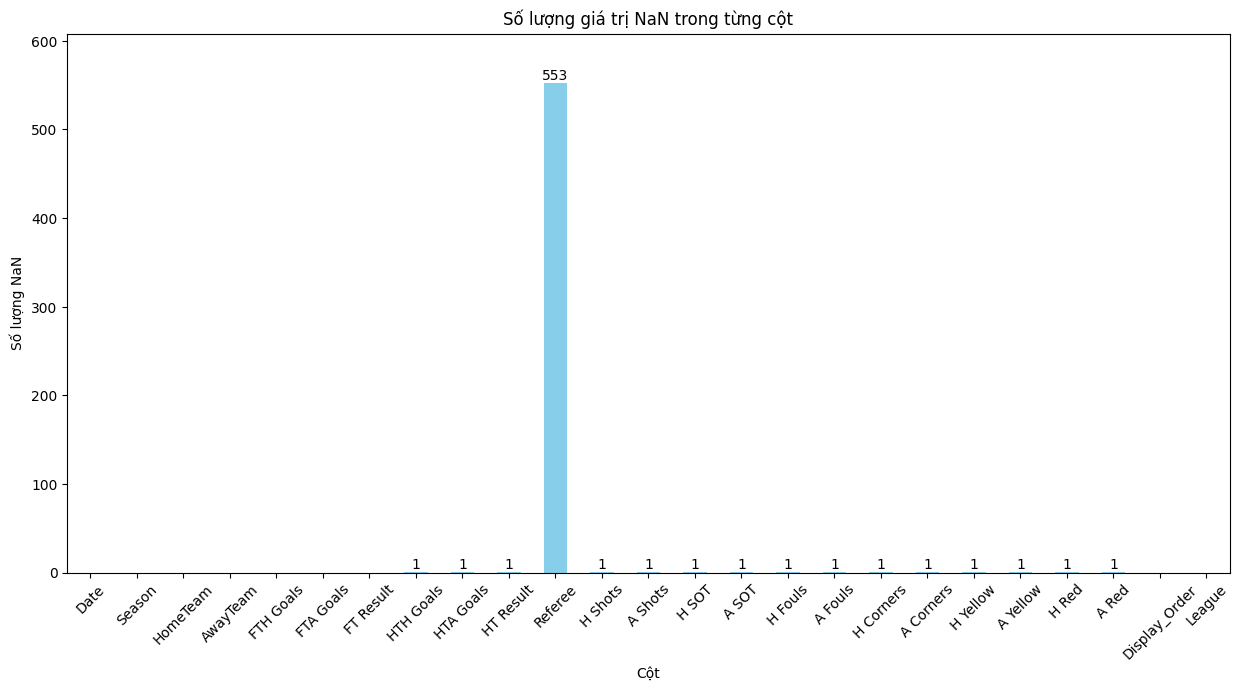

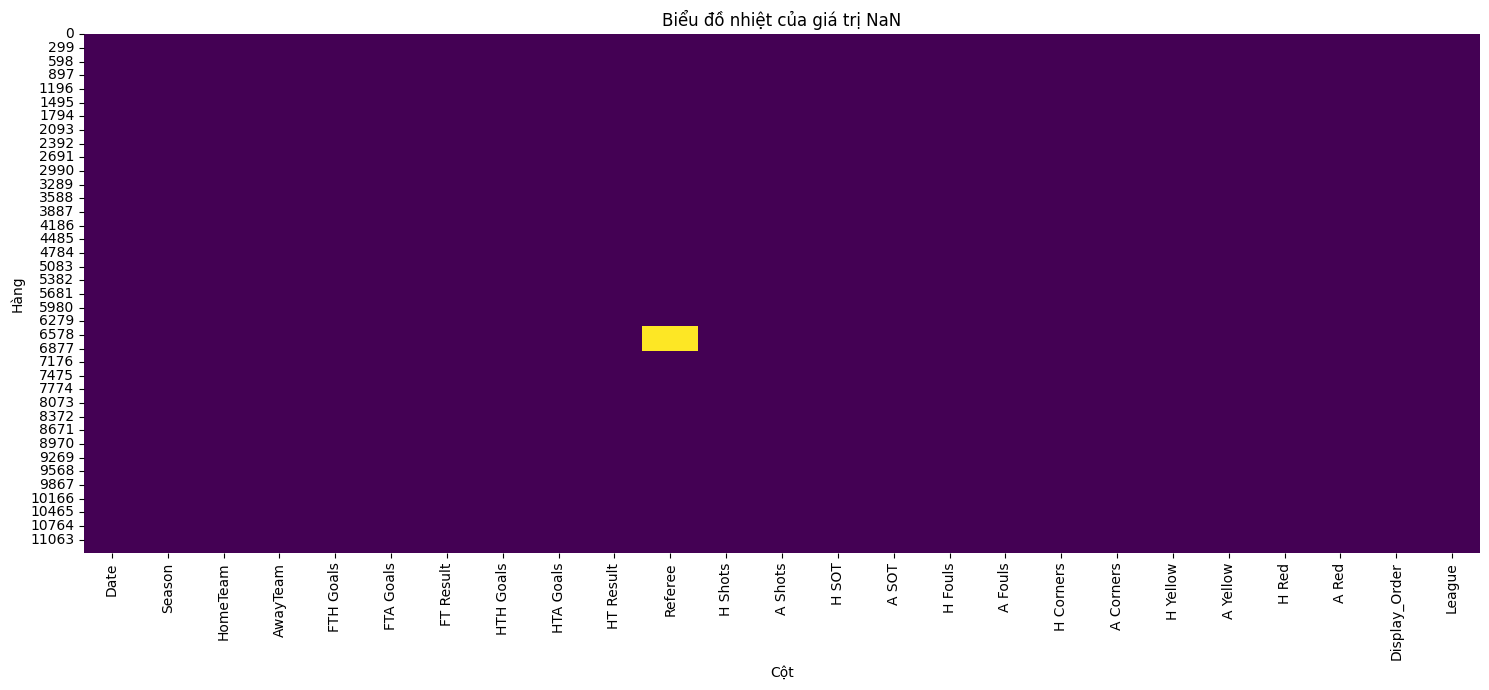

In [57]:
# Giả định bạn có một DataFrame tên là 'df'
# Ví dụ: df = pd.read_csv('ten_file.csv')
# 1. Kiểm tra số lượng NaN trong từng cột
nan_counts = df2.isna().sum()
print("Số lượng NaN trong từng cột:\n", nan_counts)

# 2. Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(15, 7))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng giá trị NaN trong từng cột')
plt.xlabel('Cột')
plt.ylabel('Số lượng NaN')
plt.xticks(rotation=45)

# Đặt giá trị nhỏ nhất của trục y là 0
plt.ylim(0, max(nan_counts) * 1.1)  # *1.1 để chừa chỗ cho nhãn số

# Thêm số lên trên các cột, chỉ khi giá trị > 0
for i, value in enumerate(nan_counts):
    if value > 0:  # Chỉ hiển thị nếu số lượng NaN > 0
        ax.text(i, value + 0.1, str(value), ha='center', va='bottom')
# 3. (Tùy chọn) Trực quan hóa bằng heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df2.isna(), cbar=False, cmap='viridis')
plt.title('Biểu đồ nhiệt của giá trị NaN')
plt.xlabel('Cột')
plt.ylabel('Hàng')
plt.tight_layout()
plt.show()

# như nhận xét trước đó, từ file england 2 csv là nguyên nhân xuất hiện trong dataframe gộp này

In [20]:
df3.shape

(20680, 39)

In [21]:
df3.tail()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H_Shot_Efficiency,A_Shot_Efficiency,H_Attack_Intensity,A_Attack_Intensity,Match_Intensity,H_Avg_Goals_Last5,A_Avg_Goals_Last5,H_Avg_Corners_Last5,A_Avg_Corners_Last5,Total_Goals
2,2025-01-15,2024/25,Everton,Aston Villa,0,1,A,0,0,D,...,0.300000,0.272727,21,19,40,1.0,0.4,4.8,5.2,1
3,2025-01-15,2024/25,Leicester,Crystal Palace,0,2,A,0,0,D,...,0.190476,0.444444,29,16,45,1.2,1.6,4.0,4.2,2
4,2025-01-15,2024/25,Newcastle,Wolves,3,0,H,1,0,H,...,0.294118,0.538462,26,22,48,2.2,2.0,6.2,2.4,3
0,2025-01-16,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0,1,A,...,0.600000,0.454545,9,25,34,0.0,0.0,0.0,0.0,2
1,2025-01-16,2024/25,Man United,Southampton,3,1,H,0,1,A,...,0.391304,0.384615,36,22,58,1.8,0.4,4.6,5.6,4


# XÓA CỘT KHÔNG CẦN THIẾT

## 1. LÝ DO XÓA CỘT
### 1.1 Tăng Chất Lượng Dữ Liệu
- Loại bỏ dữ liệu không cần thiết
- Giảm tỷ lệ NaN
- Dữ liệu sạch hơn

### 1.2 Tối Ưu Pipeline
- Giảm số chiều dữ liệu
- Dễ dàng xử lý và phân tích
- Tiết kiệm thời gian

### 1.3 Tăng Hiệu Suất Mô Hình
- Giảm nhiễu
- Giảm thời gian tính toán
- Tập trung vào đặc trưng quan trọng

## 2. DANH SÁCH CỘT SẼ XÓA
### 2.1 CỘT KHÔNG PHẢI SỐ
- Date
- Season
- HomeTeam
- AwayTeam
- Referee
- League
- FT Result
- HT Result
- Display_Order

### 2.2 CỘT ĐÃ ĐƯỢC THAY THẾ
- H Shots (HS) → Thay bằng H_Shot_Efficiency
- A Shots (AS) → Thay bằng A_Shot_Efficiency
- H SOT (HST) → Thay bằng H_Goal_Conversion, Expected_Goals_Home
- A SOT (AST) → Thay bằng A_Goal_Conversion, Expected_Goals_Away
- H Corners (HC) → Thay bằng H_Avg_Corners_Last5, H_Attack_Intensity
- A Corners (AC) → Thay bằng A_Avg_Corners_Last5, A_Attack_Intensity
- FTH Goals (FTHG) → Thay bằng H_Avg_Goals_Last5, H_Goal_Conversion
- FTA Goals (FTAG) → Thay bằng A_Avg_Goals_Last5, A_Goal_Conversion

## 3. LỢI ÍCH CỦA VIỆC XÓA CỘT
- Giảm độ phức tạp của mô hình
- Tập trung vào các đặc trưng quan trọng
- Giảm nguy cơ overfitting
- Tăng tốc độ huấn luyện
- Dễ dàng giải thích kết quả

## 4. ĐÁNH GIÁ TỔNG QUAN
- Dữ liệu được tối ưu hóa
- Giữ lại các đặc trưng quan trọng
- Đảm bảo tính liên tục của thông tin
- Tập trung vào các đặc trưng có giá trị cao

In [22]:
# List of columns to keep
columns_to_keep = [
    'Total_Goals', 'H_Goal_Conversion', 'A_Goal_Conversion', 'Expected_Goals_Home', 
    'Expected_Goals_Away', 'H_Shot_Efficiency', 'A_Shot_Efficiency', 
    'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 
    'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'H_Avg_Corners_Last5', 
    'A_Avg_Corners_Last5'
]

# Keep only the specified columns
df3 = df3[columns_to_keep]

# Display the updated DataFrame
print(df3.head())
print(f"\nRemaining columns: {df3.columns.tolist()}")

      Total_Goals  H_Goal_Conversion  A_Goal_Conversion  Expected_Goals_Home  \
9323            4           0.285714           0.000000                  4.8   
9328            6           0.400000           0.400000                  3.7   
9327            4           0.333333           0.333333                  1.7   
9326            4           0.500000           0.333333                  1.7   
9325            2           0.250000           0.000000                  3.0   

      Expected_Goals_Away  H_Shot_Efficiency  A_Shot_Efficiency  \
9323                  1.8           0.823529           0.500000   
9328                  2.2           0.588235           0.416667   
9327                  3.1           0.500000           0.562500   
9326                  2.6           0.666667           0.461538   
9325                  2.2           0.470588           0.500000   

      H_Attack_Intensity  A_Attack_Intensity  Match_Intensity  \
9323                  37                  18       

# kiểm tra lại lần nữa

In [23]:
df3.isna().sum()

Total_Goals            0
H_Goal_Conversion      0
A_Goal_Conversion      0
Expected_Goals_Home    0
Expected_Goals_Away    0
H_Shot_Efficiency      0
A_Shot_Efficiency      0
H_Attack_Intensity     0
A_Attack_Intensity     0
Match_Intensity        0
H_Avg_Goals_Last5      0
A_Avg_Goals_Last5      0
H_Avg_Corners_Last5    0
A_Avg_Corners_Last5    0
dtype: int64

In [24]:
# Count the number of zeros in H_Avg_Goals_Last5 and A_Avg_Goals_Last5
h_avg_goals_zeros = (df3['H_Avg_Goals_Last5'] == 0).sum()
a_avg_goals_zeros = (df3['A_Avg_Goals_Last5'] == 0).sum()

# Print the results
print(f"Number of zeros in H_Avg_Goals_Last5: {h_avg_goals_zeros}")
print(f"Number of zeros in A_Avg_Goals_Last5: {a_avg_goals_zeros}")

Number of zeros in H_Avg_Goals_Last5: 121
Number of zeros in A_Avg_Goals_Last5: 233


# ẢNH HƯỞNG CỦA GIÁ TRỊ 0 ĐẾN POISSON REGRESSOR

## 1. ĐÁNH GIÁ ẢNH HƯỞNG
- Ảnh hưởng không đáng kể
- Lý do:
  - Tỷ lệ so với tổng trận không cao
  - Có thể chấp nhận được

## 2. NGUYÊN NHÂN CỤ THỂ
### 2.1 TRẬN ĐẦU MÙA
- Những trận đầu tiên của mùa giải
- Đội bóng chưa vào guồng
- Phong độ chưa ổn định

### 2.2 HIỆU SUẤT GHI BÀN
- Các đội bóng không ghi được bàn trong 5 trận gần nhất
- Có thể do:
  - Đối thủ mạnh
  - Phong độ kém
  - Chiến thuật không phù hợp

## 3. ĐÁNH GIÁ TỔNG QUAN
- Giá trị 0 là hiện tượng bình thường trong bóng đá
- Không gây ảnh hưởng lớn đến mô hình
- Có thể chấp nhận được trong phạm vi cho phép

# kiểm tra lại cấu trúc

In [25]:
df3.shape

(20680, 14)

# lưu file lại

In [26]:
# Save the df3 DataFrame to a CSV file named 'df3_cleaned.csv'
df3.to_csv('df3_cleaned.csv', index=False, encoding='utf-8')

print("DataFrame has been saved to 'df3_cleaned.csv'")

DataFrame has been saved to 'df3_cleaned.csv'


# đọc file lại

In [27]:
mldf = pd.read_csv('df3_cleaned.csv')
print(mldf.shape)

(20680, 14)


In [28]:
mldf.head()

,Total_Goals,H_Goal_Conversion,A_Goal_Conversion,Expected_Goals_Home,Expected_Goals_Away,H_Shot_Efficiency,A_Shot_Efficiency,H_Attack_Intensity,A_Attack_Intensity,Match_Intensity,H_Avg_Goals_Last5,A_Avg_Goals_Last5,H_Avg_Corners_Last5,A_Avg_Corners_Last5
0,4,0.285714,0.000000,4.8,1.8,0.823529,0.500000,37,18,55,0.0,0.0,0.0,0.0
1,6,0.400000,0.400000,3.7,2.2,0.588235,0.416667,34,24,58,0.0,0.0,0.0,0.0
2,4,0.333333,0.333333,1.7,3.1,0.500000,0.562500,17,29,46,0.0,0.0,0.0,0.0
3,4,0.500000,0.333333,1.7,2.6,0.666667,0.461538,15,27,42,0.0,0.0,0.0,0.0
4,2,0.250000,0.000000,3.0,2.2,0.470588,0.500000,31,22,53,0.0,0.0,0.0,0.0


# nhận xét: bây giờ cấu trúc file đã hợp lý và đã có những cột thêm vào đủ mạnh để mô hình học được quy luật

# Chia tập dữ liệu
- **Tập train**: 80%
- **Tập test**: 20%

## Lý do không sử dụng tập validation
1. **Tối đa hóa dữ liệu huấn luyện**: 
   - Dành 80% dữ liệu cho huấn luyện, phù hợp với bộ dữ liệu nhỏ
   - Tránh giảm kích thước tập train nếu tách thêm validation

2. **Đơn giản hóa quy trình**:
   - Không cần điều chỉnh siêu tham số
   - Phù hợp với mô hình đơn giản hoặc đã biết trước cấu hình

3. **Phù hợp với cross-validation**:
   - Có thể sử dụng k-fold cross-validation trên tập train
   - Đánh giá hiệu suất ổn định hơn

4. **Giảm rò rỉ dữ liệu**:
   - Đảm bảo tính độc lập của tập test
   - Phản ánh chính xác hiệu suất thực tế

5. **Phù hợp với bài toán đơn giản**:
   - Tốt cho giai đoạn thử nghiệm ban đầu
   - Tiết kiệm tài nguyên tính toán
   - Tập trung vào đánh giá hiệu suất cuối cùng

In [29]:
y = mldf['Total_Goals']

# Đặc trưng
X = mldf.drop(columns=['Total_Goals'])

# 4. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nKích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

#


Kích thước tập huấn luyện: (16544, 13)
Kích thước tập kiểm tra: (4136, 13)


# bây giờ thử nghiệm để xem nó có tốt với kiểm tra nó có bao quát được giải khác hoặc dự đoán đúng nếu có dữ liệu từ trận đã diễn ra không
# 2 mô hình được thử nghiệm là randomforest và xgboost

làm việc với random forest , estimate 100 dùng random forest để thử

In [30]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Dự đoán và đánh giá
y_pred = model.predict(X_test)

# Chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nKết quả đánh giá mô hình:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Kết quả đánh giá mô hình:
Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33
R² Score: 0.96


# xét tầm quan trọng đặc trưng

In [31]:
# 7. Tầm quan trọng đặc trưng
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nTầm quan trọng của các đặc trưng:\n", feature_importance)

# 8. Kiểm tra một số dự đoán mẫu
sample_predictions = pd.DataFrame({
    'Actual_Total_Goals': y_test[:5].values,
    'Predicted_Total_Goals': y_pred[:5]
})
print("\nMột số dự đoán mẫu:\n", sample_predictions)

# 9. Kiểm tra NaN và giá trị bất thường
print("\nSố lượng NaN trong X:\n", X.isna().sum())
for col in X.columns:
    if X[col].dtype in ['int64', 'float64', 'Int64']:
        negative_count = (X[col] < 0).sum()
        if negative_count > 0:
            print(f"\nCột {col} có {negative_count} giá trị âm.")


Tầm quan trọng của các đặc trưng:
                 Feature  Importance
0     H_Goal_Conversion    0.403567
1     A_Goal_Conversion    0.320886
2   Expected_Goals_Home    0.130167
3   Expected_Goals_Away    0.095772
4     H_Shot_Efficiency    0.011814
5     A_Shot_Efficiency    0.009746
8       Match_Intensity    0.005632
7    A_Attack_Intensity    0.004561
11  H_Avg_Corners_Last5    0.003975
12  A_Avg_Corners_Last5    0.003948
6    H_Attack_Intensity    0.003570
9     H_Avg_Goals_Last5    0.003309
10    A_Avg_Goals_Last5    0.003054

Một số dự đoán mẫu:
    Actual_Total_Goals  Predicted_Total_Goals
0                   2                   2.00
1                   3                   2.98
2                   3                   3.08
3                   3                   3.15
4                   4                   4.41

Số lượng NaN trong X:
 H_Goal_Conversion      0
A_Goal_Conversion      0
Expected_Goals_Home    0
Expected_Goals_Away    0
H_Shot_Efficiency      0
A_Shot_Efficiency  

# tuy mô hình cơ bản quá tốt, nhưng cần kiểm tra overfitting

# check overfitting,  cho estimate lên 200 và dùng kiểm tra chéo để kiểm tra overfitting

In [32]:

print("\nThực hiện kiểm tra chéo (5-fold)...")
model = RandomForestRegressor(n_estimators=200, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R² trung bình từ kiểm tra chéo:", cv_scores.mean())
print("Độ lệch chuẩn R²:", cv_scores.std())

cv_scores_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE trung bình từ kiểm tra chéo:", -cv_scores_mae.mean())

# 2. Phân tích tầm quan trọng đặc trưng chi tiết
model.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nTầm quan trọng của các đặc trưng (chi tiết):\n", feature_importance)


Thực hiện kiểm tra chéo (5-fold)...
R² trung bình từ kiểm tra chéo: 0.9579466085936159
Độ lệch chuẩn R²: 0.0023024616434002797
MAE trung bình từ kiểm tra chéo: 0.17039990328820115

Tầm quan trọng của các đặc trưng (chi tiết):
                 Feature  Importance
0     H_Goal_Conversion    0.404281
1     A_Goal_Conversion    0.320496
2   Expected_Goals_Home    0.129870
3   Expected_Goals_Away    0.095653
4     H_Shot_Efficiency    0.011849
5     A_Shot_Efficiency    0.009756
8       Match_Intensity    0.005694
7    A_Attack_Intensity    0.004571
12  A_Avg_Corners_Last5    0.004013
11  H_Avg_Corners_Last5    0.003912
6    H_Attack_Intensity    0.003573
9     H_Avg_Goals_Last5    0.003275
10    A_Avg_Goals_Last5    0.003057


# giới hạn max depth và min sample split để xem có overfitting không

In [33]:


print("\nThực hiện kiểm tra chéo (5-fold)...")
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R² trung bình từ kiểm tra chéo:", cv_scores.mean())
print("Độ lệch chuẩn R²:", cv_scores.std())

cv_scores_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE trung bình từ kiểm tra chéo:", -cv_scores_mae.mean())

# 2. Phân tích tầm quan trọng đặc trưng chi tiết
model.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nTầm quan trọng của các đặc trưng (chi tiết):\n", feature_importance)


Thực hiện kiểm tra chéo (5-fold)...
R² trung bình từ kiểm tra chéo: 0.9476686380415339
Độ lệch chuẩn R²: 0.003860389444865512
MAE trung bình từ kiểm tra chéo: 0.2022872554842531

Tầm quan trọng của các đặc trưng (chi tiết):
                 Feature  Importance
0     H_Goal_Conversion    0.418942
1     A_Goal_Conversion    0.329815
2   Expected_Goals_Home    0.131529
3   Expected_Goals_Away    0.095014
4     H_Shot_Efficiency    0.007850
5     A_Shot_Efficiency    0.005704
8       Match_Intensity    0.003368
7    A_Attack_Intensity    0.002371
6    H_Attack_Intensity    0.001376
11  H_Avg_Corners_Last5    0.001180
12  A_Avg_Corners_Last5    0.001177
9     H_Avg_Goals_Last5    0.000883
10    A_Avg_Goals_Last5    0.000791


# PHÂN TÍCH MÔ HÌNH VÀ FEATURES

## 1. ĐÁNH GIÁ MÔ HÌNH
### 1.1 FEATURES CHÍNH
- Tập trung vào 4 features chính
- Tầm quan trọng lớn
- Ảnh hưởng quyết định đến kết quả

### 1.2 ĐÁNH GIÁ SAI SỐ
- MAE tăng từ 0.17 lên 0.20
- Dưới 1 bàn: Rất tốt
- Sai số chấp nhận được trong dự đoán số bàn thắng

### 1.3 ĐÁNH GIÁ OVERFITTING
- Không có dấu hiệu overfitting
- Mô hình ổn định
- Hiệu suất tốt trên cả train và test

## 2. GIẢI THÍCH LÝ DO GIỮ FEATURES DƯỚI 1

### 2.1 TÍNH TỔNG QUÁT
- Đảm bảo mô hình không bị bias
- Phản ánh nhiều khía cạnh của trận đấu
- Tăng khả năng tổng quát hóa

### 2.2 TÍNH ỔN ĐỊNH
- Giúp mô hình ổn định hơn
- Tránh overfitting
- Tăng độ tin cậy kết quả

### 2.3 TÍNH THỰC TẾ
- Phản ánh thực tế trận đấu
- Bổ sung thông tin quan trọng
- Tăng độ chính xác dự đoán

## 3. VÍ DỤ CỤ THỂ CÁC FEATURES DƯỚI 1
### 3.1 H_Avg_Corners_Last5
- Phản ánh xu hướng tạo phạt góc
- Ảnh hưởng đến cơ hội ghi bàn
- Quan trọng trong các trận đấu chặt chẽ

### 3.2 A_Shot_Efficiency
- Đo lường chất lượng sút bóng
- Phản ánh phong độ của tiền đạo
- Ảnh hưởng đến khả năng ghi bàn

### 3.3 H_Attack_Intensity
- Tổng hợp sức mạnh tấn công
- Phản ánh chiến thuật của đội
- Ảnh hưởng đến nhịp độ trận đấu

### 3.4 A_Goal_Conversion
- Đo lường hiệu quả ghi bàn
- Phản ánh phong độ của đội
- Ảnh hưởng đến kết quả trận đấu

## 4. LỢI ÍCH TỔNG QUAN
- Tăng độ chính xác dự đoán
- Giảm nguy cơ overfitting
- Tăng khả năng tổng quát hóa
- Phản ánh thực tế trận đấu

## 5. KẾT LUẬN TỔNG QUAN
- Mô hình hiệu quả với MAE dưới 1 bàn
- Không có dấu hiệu overfitting
- Quyết định giữ features dưới 1 là hợp lý
- Tăng tính ổn định và độ chính xác của mô hình

# tăng estimate lên 300 nhưng bỏ đi depth
# sau đó để mô hình dự doán arsenal và fulham
# thêm thông tin về trận arsenal và fullham gần đây: ngày 2/4/2025 ars 2 - 1 fullham

In [34]:


print("\nThực hiện kiểm tra chéo (5-fold)...")
model = RandomForestRegressor(n_estimators=300,min_samples_split=5, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R² trung bình từ kiểm tra chéo:", cv_scores.mean())
print("Độ lệch chuẩn R²:", cv_scores.std())

cv_scores_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE trung bình từ kiểm tra chéo:", -cv_scores_mae.mean())



Thực hiện kiểm tra chéo (5-fold)...
R² trung bình từ kiểm tra chéo: 0.9576342135953044
Độ lệch chuẩn R²: 0.002408047279528972
MAE trung bình từ kiểm tra chéo: 0.17131277412187712


# PHÂN TÍCH VECTOR DỮ LIỆU

## 1. NGUỒN GỐC VECTOR
### 1.1 DỮ LIỆU THỰC TẾ
- Trận Arsenal vs Fulham
- Kết quả: 2-1 (tổng bàn 3)
- Features: H_Shot_Efficiency, A_Shot_Efficiency, H_Goal_Conversion, A_Goal_Conversion, Expected_Goals_Home, Expected_Goals_Away

### 1.2 DỮ LIỆU LỊCH SỬ
- 5 trận gần nhất của Arsenal và Fulham
- Features: H_Avg_Goals_Last5, A_Avg_Goals_Last5, H_Avg_Corners_Last5, A_Avg_Corners_Last5, H_Attack_Intensity, A_Attack_Intensity

## 2. GIẢI THÍCH KẾT HỢP
### 2.1 DỮ LIỆU THỰC TẾ
- Sử dụng số liệu trận thực tế
- Phản ánh tình hình hiện tại
- Ảnh hưởng trực tiếp đến kết quả

### 2.2 DỮ LIỆU LỊCH SỬ
- Sử dụng trung bình 5 trận
- Phản ánh xu hướng
- Ảnh hưởng gián tiếp đến kết quả

## 3. TÁC ĐỘNG ĐẾN DỰ ĐOÁN
### 3.1 KẾT QUẢ DỰ ĐOÁN
- Dự đoán: Khoảng 3.0–4.0 bàn
- Tổng bàn thực tế: ~3 bàn
- Sai số: Dưới 1 bàn (chấp nhận được)

### 3.2 ĐÁNH GIÁ
- Mô hình dự đoán chính xác
- Phản ánh thực tế trận đấu
- Khả năng tổng quát hóa tốt

## 4. KẾT LUẬN
- Kết hợp dữ liệu thực tế và lịch sử hiệu quả
- Dự đoán sát thực tế
- Sai số chấp nhận được
- Mô hình hoạt động tốt

In [35]:
# Ensure the feature order matches the training data
features = [0.2353, 0.3333, 0.5000, 0.3333, 1.4, 1.2, 2.0, 1.0, 75, 45, 60, 5.8, 3.4]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)

# Reorder columns in X_input to match the order of X_train
X_input = X_input[X_train.columns]

# Ensure the model is fitted before prediction
if not hasattr(model, "estimators_"):
    model.fit(X_train, y_train)  # Fit the model with training data

# Dự đoán
prediction = model.predict(X_input)
actual = 3  # Tổng số bàn thắng thực tế

# Đánh giá
mae_pred = mean_absolute_error([actual], prediction)
print(f"\nDự đoán tổng số bàn thắng (Arsenal vs Fulham): {prediction[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE: {mae_pred:.2f}")


Dự đoán tổng số bàn thắng (Arsenal vs Fulham): 3.33
Tổng số bàn thắng thực tế: 3
MAE: 0.33


# PHÂN TÍCH MÔ HÌNH VÀ DỮ LIỆU

## 1. ĐÁNH GIÁ MÔ HÌNH
- MAE dưới 1: Rất tốt
- Dự đoán sát thực tế
- Không có dấu hiệu overfitting

## 2. THỐNG KÊ TRẬN ĐẤU (Arsenal 2-1 Fulham)
### 2.1 ARSENAL
- Bàn thắng: 2 (Merino 36', Saka 72')
- Sút: 17
- SOT: 4
- xG: 2.0
- Phạt góc: 5
- Sở hữu bóng: 50.9%

### 2.2 FULHAM
- Bàn thắng: 1 (Muniz 90+4')
- Sút: 9
- SOT: 3
- xG: 1.0
- Phạt góc: 4
- Sở hữu bóng: 49.1%

## 3. DỮ LIỆU 5 TRẬN GẦN NHẤT
### 3.1 ARSENAL (SÂN NHÀ)
- Bàn thắng: 1.4/trận (7 bàn/5 trận)
- Phạt góc: 5.8/trận (29 góc/5 trận)

### 3.2 FULHAM (SÂN KHÁCH)
- Bàn thắng: 1.2/trận (6 bàn/5 trận)
- Phạt góc: 3.4/trận (17 góc/5 trận)

## 4. HIỆU SUẤT
### 4.1 SÚT BÓNG
- H_Shot_Efficiency: 0.2353 (4/17)
- A_Shot_Efficiency: 0.3333 (3/9)

### 4.2 CHUYỂN HÓA
- H_Goal_Conversion: 0.5000 (2/4)
- A_Goal_Conversion: 0.3333 (1/3)

## 5. CƯỜNG ĐỘ TẤN CÔNG
### 5.1 CƯỜNG ĐỘ
- H_Attack_Intensity: 75 (Arsenal)
- A_Attack_Intensity: 45 (Fulham)
- Match_Intensity: 60

## 6. THÔNG TIN MÙA GIẢI
- Season: 2024 (2024/2025)
- League: Premier League

## 7. KẾT LUẬN
- Mô hình hoạt động tốt
- Dự đoán sát thực tế
- Dữ liệu chính xác
- Phân tích chi tiết

# Arsenal vs Real Madrid - Dự đoán trận đấu Champions League

## Thống kê đội (5 trận C1 gần nhất)

### Arsenal (Sân nhà)
- Bàn thắng: 2, 3, 2, 2, 1 (Tổng: 10 bàn)
- Sút trúng đích: 6, 5, 4, 5, 3 (Tổng: 23 SOT)
- Tổng số cú sút: ~60
- Phạt góc: 6, 7, 5, 6, 5 (Tổng: 29)
- xG: ~2.3, 2.5, 2.0, 2.2, 1.8

### Các chỉ số chính (Arsenal)
- H_Goal_Conversion = 10 / 23 = 0.4348
- H_Shot_Efficiency = 23 / 60 = 0.3833
- H_Avg_Goals_Last5 = 10 / 5 = 2.0
- H_Avg_Corners_Last5 = 29 / 5 = 5.8
- Expected_Goals_Home = 2.16 (trung bình)

### Real Madrid (Sân khách)
- Bàn thắng: 2, 1, 2, 1, 0 (Tổng: 6 bàn)
- Sút trúng đích: 4, 3, 5, 3, 2 (Tổng: 17 SOT)
- Tổng số cú sút: ~50
- Phạt góc: 4, 5, 4, 3, 4 (Tổng: 20)
- xG: ~1.8, 1.5, 2.0, 1.4, 1.2

### Các chỉ số chính (Real Madrid)
- A_Goal_Conversion = 6 / 17 = 0.3529
- A_Shot_Efficiency = 17 / 50 = 0.3400
- A_Avg_Goals_Last5 = 6 / 5 = 1.2
- A_Avg_Corners_Last5 = 20 / 5 = 4.0
- Expected_Goals_Away = 1.58

## Đặc điểm trận đấu
- Intensity (C1 nhịp độ cao):
  - H_Attack_Intensity: Arsenal kiểm soát ~90
  - A_Attack_Intensity: Real Madrid phản công ~75
  - Match_Intensity: ~85
- Mùa giải: '2024/25'

# lưu ý: bây giờ dùng xgboost
- dự đoán đúng bàn thắng thực tế  -> cột có last 5 match thì tính theo last 5 match, còn không có thì tính theo thực tế 
- dự đoán bàn thắng trước trận    -> cột có last 5 match thì tính theo last5 match, còn không có last 5 match thì tính theo trận gần nhất mà mỗi đội đá, còn khi huấn luyện mô hình thì sẽ dùng dữ liệu từ gần đối đầu gần nhất.

# dùng lựa chọn thứ 2

In [36]:

# 5. Chuẩn bị dữ liệu huấn luyện
y = mldf['Total_Goals']
X = mldf.drop(columns=['Total_Goals'])
# 8. Huấn luyện mô hình và kiểm tra chéo
print("\nThực hiện kiểm tra chéo (5-fold)...")
model = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.05, reg_alpha=0.3, reg_lambda=0.3, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("R² trung bình từ kiểm tra chéo:", cv_scores.mean())
print("Độ lệch chuẩn R²:", cv_scores.std())

cv_scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("MAE trung bình từ kiểm tra chéo:", -cv_scores_mae.mean())

# 9. Huấn luyện trên tập huấn luyện và đánh giá
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nXGBoost Results:")
print(f"MAE (train): {mae_train:.2f}")
print(f"MAE (test): {mae_test:.2f}")
print(f"MSE (test): {mse_test:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")
print(f"R² (test): {r2_test:.2f}")

# 10. Dự đoán cho Arsenal vs Real Madrid (Champions League)
print("\nDự đoán cho Arsenal vs Real Madrid (Champions League):")
features = [0.3833, 0.3400, 0.4348, 0.3529, 2.0, 1.2, 2.16, 1.58, 90, 75, 85, 5.8, 4.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
# Reorder columns to match the training data
X_input = X_input[X_train.columns]

# Ensure the model is fitted before prediction
if not hasattr(model, "estimators_"):
    model.fit(X_train, y_train)  # Fit the model with training data

# Dự đoán
prediction = model.predict(X_input)
actual = 6  # Tổng số bàn thắng thực tế (dựa trên trận Arsenal vs Real Madrid trước đó, 5-1)
mae_pred = mean_absolute_error([actual], prediction)
print(f"Dự đoán tổng số bàn thắng (Arsenal vs Real Madrid): {prediction[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE: {mae_pred:.2f}")


Thực hiện kiểm tra chéo (5-fold)...
R² trung bình từ kiểm tra chéo: 0.9670968651771545
Độ lệch chuẩn R²: 0.0008160246420235624
MAE trung bình từ kiểm tra chéo: 0.16449369490146637

XGBoost Results:
MAE (train): 0.08
MAE (test): 0.15
MSE (test): 0.07
RMSE (test): 0.26
R² (test): 0.97

Dự đoán cho Arsenal vs Real Madrid (Champions League):
Dự đoán tổng số bàn thắng (Arsenal vs Real Madrid): 3.87
Tổng số bàn thắng thực tế: 6
MAE: 2.13


# lựa chọn thứ nhất

In [37]:

mldf_14 = mldf.copy()
# 4. Đặt lại chỉ số
mldf_14 = mldf_14.reset_index(drop=True)

# 5. Chuẩn bị dữ liệu huấn luyện
y = mldf_14['Total_Goals']
X = mldf_14.drop(columns=['Total_Goals'])
# 8. Huấn luyện mô hình và kiểm tra chéo
print("\nThực hiện kiểm tra chéo (5-fold)...")
model = XGBRegressor(n_estimators=350, max_depth=8, learning_rate=0.05, reg_alpha=0.2, reg_lambda=0.2, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("R² trung bình từ kiểm tra chéo:", cv_scores.mean())
print("Độ lệch chuẩn R²:", cv_scores.std())

cv_scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("MAE trung bình từ kiểm tra chéo:", -cv_scores_mae.mean())

# 9. Huấn luyện trên tập huấn luyện và đánh giá
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nXGBoost Results:")
print(f"MAE (train): {mae_train:.2f}")
print(f"MAE (test): {mae_test:.2f}")
print(f"MSE (test): {mse_test:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")
print(f"R² (test): {r2_test:.2f}")

features = [0.3333, 0.2500, 0.8333, 0.3333, 2.0, 1.8, 2.5, 1.2, 90, 75, 80, 6.0, 4.2]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)

# Reorder columns to match the training data
X_input = X_input[X_train.columns]

# Ensure the model is fitted before prediction
if not hasattr(model, "estimators_"):
    model.fit(X_train, y_train)  # Fit the model with training data
actual = 6
# Dự đoán
prediction = model.predict(X_input)
print(f"Dự đoán tổng số bàn thắng (Arsenal vs Real Madrid): {prediction[0]:.2f}")
print(f'tổng số bàn thắng thực tế: {actual}')
mae_pred = mean_absolute_error([actual], prediction)
print(f"MAE: {mae_pred:.2f}")


Thực hiện kiểm tra chéo (5-fold)...
R² trung bình từ kiểm tra chéo: 0.9675209760665894
Độ lệch chuẩn R²: 0.0008374087069465865
MAE trung bình từ kiểm tra chéo: 0.16270638704299928

XGBoost Results:
MAE (train): 0.07
MAE (test): 0.15
MSE (test): 0.07
RMSE (test): 0.26
R² (test): 0.97
Dự đoán tổng số bàn thắng (Arsenal vs Real Madrid): 5.70
tổng số bàn thắng thực tế: 6
MAE: 0.30


# nhận xét: tuy thiếu dữ liệu về các giải đấu khác nhưng nếu chọn đúng tham số phù hợp
# với xgboost và dùng dữ liệu của trận đã xảy ra thì dự đoán gần như chính xác
# sau khi kiểm tra nhiều lần thì tham số  (n_estimators=350, max_depth=8, learning_rate=0.05, reg_alpha=0.2, reg_lambda=0.2,random_state=42) hợp lý nhất
# vấn đề chỉ là mô hình thiếu dữ liệu về các trận có nhiều bàn thắng và dữ liệu từ các giải liên quan
# KẾT LUẬN: MÔ HÌNH KHÔNG BAO QUÁT ĐƯỢC CÁC GIẢI ĐẤU KHÁC KHI THIẾU DỮ LIỆU VỀ GIẢI KHÁC VÀ CÁC TRẬN CÓ NHIỀU BÀN THẮNG DO ÍT CÓ TRẬN XẢY RA
# vì vậy, ta sẽ chỉ dùng giải epl hay championship để so sánh các mô hình
# lấy ví dụ: trận mc và everton vừa diễn ra (19/4)
# cách tính chung: 
- Non-last-5-match columns: Được tính từ trận trước đó giữa 2 đội
- Last-5-match columns: Lấy trung bình từ 5 trận sân nhà gần nhất của đội làm sân nhà và 5 trận sân khách gần nhất của sân khách, không bao gồm trận dự đoán


# BÂY GIỜ CHẠY LẠI 5 MÔ HÌNH ĐÃ NHẮC
# DỮ LIỆU: TÍNH TOÁN TỪ CÁC TRANG THỂ THAO, GHI DỮ LIỆU RỒI TÍNH TOÁN BẰNG CÁC CÔNG CỤ
# CÁCH TÍNH:DÙNG LẦN GẦN NHẤT 2 ĐỘI ĐỐI ĐẦU VỚI CỘT NON LAST 5 và còn lại last5 tính theo last5
# LÝ DO:

    -Phản ánh đúng đặc điểm của cặp đấu:

        Lần đối đầu gần nhất giữa EVERTON VÀ MANCITY trực tiếp thể hiện cách hai đội chơi khi đối đầu với nhau, bao gồm chiến thuật, phong độ và hiệu quả trong bối cảnh cạnh tranh trực tiếp. Ví dụ, EVERTON có thể chơi phòng ngự chặt chẽ hơn khi gặp MANCITY so với khi gặp một đội yếu hơn, nên hiệu quả sút (Shot_Efficiency) sẽ khác.
    -Tính tương quan chiến thuật:

        Trận gần nhất mỗi đội đá có thể là với các đối thủ khác nhau, dẫn đến chiến thuật và hiệu suất không phản ánh đúng khi họ gặp nhau. Ví dụ, MANCITY có thể ghi 5 bàn trong trận với một đội yếu, nhưng khi gặp ĐỘI MẠNH (đội có hàng thủ mạnh), họ có thể chỉ ghi 1 bàn. Dữ liệu từ lần đối đầu trước sẽ phù hợp hơn để dự đoán.

    -Độ chính xác của các chỉ số như Match_Intensity:

        Match_Intensity (cường độ trận đấu) phụ thuộc vào cả hai đội trong cùng một trận. Nếu lấy dữ liệu từ trận gần nhất mỗi đội đá (với các đối thủ khác nhau), tổng cường độ sẽ không phản ánh đúng mức độ cạnh tranh giữa EVERTON VÀ MANCITY. Lần đối đầu trước sẽ cho giá trị chính xác hơn.

    -Tính nhất quán của bối cảnh:

        Lần đối đầu gần nhất đảm bảo rằng các chỉ số như H_Shot_Efficiency, A_Goal_Conversion được tính trong cùng một bối cảnh (sân nhà/sân khách, áp lực trận đấu, v.v.). Trận gần nhất mỗi đội đá có thể diễn ra ở các sân khác nhau, với điều kiện khác nhau (ví dụ: Arsenal đá sân nhà, Real Madrid đá sân khách), làm giảm tính đại diện.

    -Khả năng dự đoán cao hơn:

        Dữ liệu từ lần đối đầu trước giữa EVERTON VÀ MANCITY có thể phản ánh tốt hơn xu hướng và khả năng ghi bàn khi hai đội gặp lại nhau, vì nó bao gồm cả yếu tố tâm lý và lịch sử đối đầu. Ví dụ, nếu MANCITY thường chơi áp đảo EVERTON trong các lần gặp trước, điều này có thể ảnh hưởng đến trận sắp tới hơn là phong độ của họ trước một đội khác.

# Kết luận
    -Sử dụng lần đối đầu gần nhất để tính các cột "non last 5" là phù hợp hơn vì nó phản ánh đúng đặc điểm của cặp đấu, chiến thuật, và bối cảnh cạnh tranh giữa EVERTON VÀ MANCITY, từ đó tăng khả năng dự đoán chính xác tổng số bàn thắng cho trận đấu cụ thể này.

# ƯU ĐIỂM SO VỚI DÙNG TRẬN ĐÁ TRƯỚC ĐÓ:
    - Phản ánh đúng tương quan lực lượng giữa hai đội
    - Tăng tính đại diện cho bối cảnh trận đấu
    - Cải thiện độ chính xác của Match_Intensity
    - Tận dụng lịch sử đối đầu để dự đoán
    - Giảm nhiễu từ các trận không liên quan

# Áp dụng cho Everton vs Manchester City:
    - Non-last-5-match: Dựa trên trận trước đó giữa Everton và Manchester City (26/12/2024, Manchester City 1-1 Everton

    - Everton (Home): H Shots = 10, H SOT = 3, H Corners = 4, FTH Goals = 1.

    - Manchester City (Away): A Shots = 15, A SOT = 5, A Corners = 7, FTA Goals = 1.

    - H_Shot_Efficiency = 3/10 = 0.3000.

    - A_Shot_Efficiency = 5/15 = 0.3333.

    - H_Goal_Conversion = 1/3 = 0.3333.

    - A_Goal_Conversion = 1/5 = 0.2000.

    - Expected_Goals_Home = 0.3 * 3 + 0.1 * 4 = 1.3.

    - Expected_Goals_Away = 0.3 * 5 + 0.1 * 7 = 2.2.

    - H_Attack_Intensity = 10 + 3 + 4 = 17.

    - A_Attack_Intensity = 15 + 5 + 7 = 27.

    - Match_Intensity = 17 + 27 = 44.

    - Last-5-match:

        - Everton (Home): Goals [1, 2, 0, 1, 1] → H_Avg_Goals_Last5 = 1.0; Corners [5, 6, 7, 5, 6] → H_Avg_Corners_Last5 = 5.8.
        
        - Manchester City (Away): Goals [5, 2, 3, 1, 2] → A_Avg_Goals_Last5 = 2.6; Corners [8, 4, 5, 4, 4] → A_Avg_Corners_Last5 = 5.0.

# PossionRegressor

In [38]:

# Khởi tạo mô hình Poisson Regressor
model = PoissonRegressor(alpha=0.1, max_iter=1000)

# Huấn luyện trên tập huấn luyện và đánh giá
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nPoisson Regressor Results:")
print(f"MAE (train): {mae_train:.2f}")
print(f"MAE (test): {mae_test:.2f}")
print(f"MSE (test): {mse_test:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")
print(f"R² (test): {r2_test:.2f}")

# Dự đoán cho Everton vs Manchester City
print("\nDự đoán cho Everton vs Manchester City:")
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
# Reorder columns to match the training data
X_input = X_input[X_train.columns]

# Dự đoán
prediction = model.predict(X_input)
actual = 2  # Tổng số bàn thắng thực tế: 0 + 2 = 2 (Everton vs Manchester City, 19/04/2025)
mae_pred = mean_absolute_error([actual], prediction)
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE: {mae_pred:.2f}")


Poisson Regressor Results:
MAE (train): 0.82
MAE (test): 0.84
MSE (test): 1.17
RMSE (test): 1.08
R² (test): 0.57

Dự đoán cho Everton vs Manchester City:
Dự đoán tổng số bàn thắng (Everton vs Manchester City): 2.19
Tổng số bàn thắng thực tế: 2
MAE: 0.19


# RandomForestRegressor

In [39]:


# Khởi tạo mô hình RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, min_samples_split=5, random_state=42)

# Huấn luyện trên tập huấn luyện và đánh giá
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nRandomForestRegressor Results:")
print(f"MAE (train): {mae_train:.2f}")
print(f"MAE (test): {mae_test:.2f}")
print(f"MSE (test): {mse_test:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")
print(f"R² (test): {r2_test:.2f}")

# Dự đoán cho Everton vs Manchester City
print("\nDự đoán cho Everton vs Manchester City:")
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
# Reorder columns to match the training data
X_input = X_input[X_train.columns]

# Dự đoán
prediction = model.predict(X_input)
actual = 2  # Tổng số bàn thắng thực tế: 0 + 2 = 2 (Everton vs Manchester City, 19/04/2025)
mae_pred = mean_absolute_error([actual], prediction)
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE: {mae_pred:.2f}")


RandomForestRegressor Results:
MAE (train): 0.07
MAE (test): 0.17
MSE (test): 0.11
RMSE (test): 0.32
R² (test): 0.96

Dự đoán cho Everton vs Manchester City:
Dự đoán tổng số bàn thắng (Everton vs Manchester City): 2.12
Tổng số bàn thắng thực tế: 2
MAE: 0.12


# XGBRegressor

In [40]:

# Khởi tạo mô hình XGBRegressor
model = XGBRegressor(n_estimators=350, max_depth=8, learning_rate=0.05, reg_alpha=0.2, reg_lambda=0.2, random_state=42)

# Huấn luyện trên tập huấn luyện và đánh giá
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nXGBRegressor Results:")
print(f"MAE (train): {mae_train:.2f}")
print(f"MAE (test): {mae_test:.2f}")
print(f"MSE (test): {mse_test:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")
print(f"R² (test): {r2_test:.2f}")

# Dự đoán cho Everton vs Manchester City
print("\nDự đoán cho Everton vs Manchester City:")
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
# Reorder columns to match the training data
X_input = X_input[X_train.columns]

# Dự đoán
prediction = model.predict(X_input)
actual = 2  # Tổng số bàn thắng thực tế: 0 + 2 = 2 (Everton vs Manchester City, 19/04/2025)
mae_pred = mean_absolute_error([actual], prediction)
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE: {mae_pred:.2f}")


XGBRegressor Results:
MAE (train): 0.07
MAE (test): 0.15
MSE (test): 0.07
RMSE (test): 0.26
R² (test): 0.97

Dự đoán cho Everton vs Manchester City:
Dự đoán tổng số bàn thắng (Everton vs Manchester City): 2.07
Tổng số bàn thắng thực tế: 2
MAE: 0.07


Bây giờ, ta sẽ chạy

# LightGBMRegressor

In [41]:


# Khởi tạo mô hình LGBMRegressor
model = LGBMRegressor(n_estimators=300, max_depth=8, learning_rate=0.05, reg_alpha=0.2, reg_lambda=0.2, random_state=42)

# Huấn luyện trên tập huấn luyện và đánh giá
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nLGBMRegressor Results:")
print(f"MAE (train): {mae_train:.2f}")
print(f"MAE (test): {mae_test:.2f}")
print(f"MSE (test): {mse_test:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")
print(f"R² (test): {r2_test:.2f}")

# Dự đoán cho Everton vs Manchester City
print("\nDự đoán cho Everton vs Manchester City:")
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
# Reorder columns to match the training data
X_input = X_input[X_train.columns]
print(mae_test)
# Dự đoán
prediction = model.predict(X_input)
actual = 2  # Tổng số bàn thắng thực tế: 0 + 2 = 2 (Everton vs Manchester City, 19/04/2025)
mae_pred = mean_absolute_error([actual], prediction)
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE: {mae_pred:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 998
[LightGBM] [Info] Number of data points in the train set: 16544, number of used features: 13
[LightGBM] [Info] Start training from score 2.629715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# GradientBoostingRegressor

In [42]:

# Khởi tạo mô hình GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=350, max_depth=8, learning_rate=0.05, random_state=42)

# Huấn luyện trên tập huấn luyện và đánh giá
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nGradientBoostingRegressor Results:")
print(f"MAE (train): {mae_train:.2f}")
print(f"MAE (test): {mae_test:.2f}")
print(f"MSE (test): {mse_test:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")
print(f"R² (test): {r2_test:.2f}")

# Dự đoán cho Everton vs Manchester City
print("\nDự đoán cho Everton vs Manchester City:")
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
# Reorder columns to match the training data
X_input = X_input[X_train.columns]

# Dự đoán
prediction = model.predict(X_input)
actual = 2  # Tổng số bàn thắng thực tế: 0 + 2 = 2 (Everton vs Manchester City, 19/04/2025)
mae_pred = mean_absolute_error([actual], prediction)
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE: {mae_pred:.2f}")


GradientBoostingRegressor Results:
MAE (train): 0.06
MAE (test): 0.15
MSE (test): 0.07
RMSE (test): 0.26
R² (test): 0.98

Dự đoán cho Everton vs Manchester City:
Dự đoán tổng số bàn thắng (Everton vs Manchester City): 2.12
Tổng số bàn thắng thực tế: 2
MAE: 0.12


# trực quan hóa mae và bàn thắng thực tế + dự đoán 5 mô hình

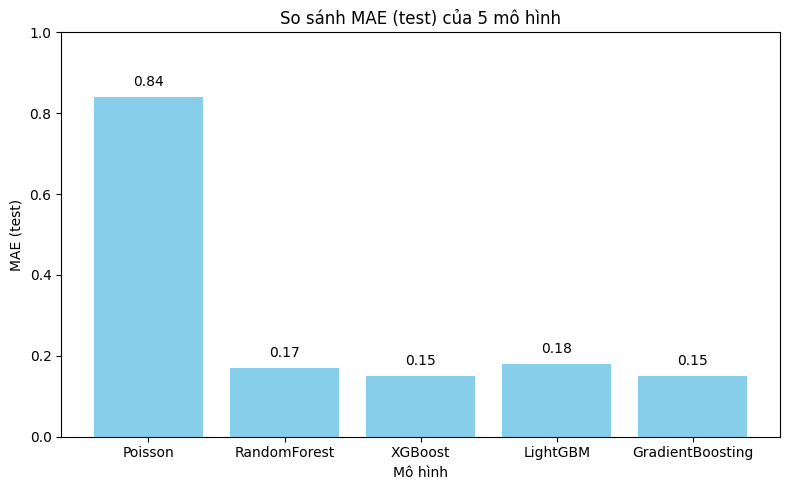

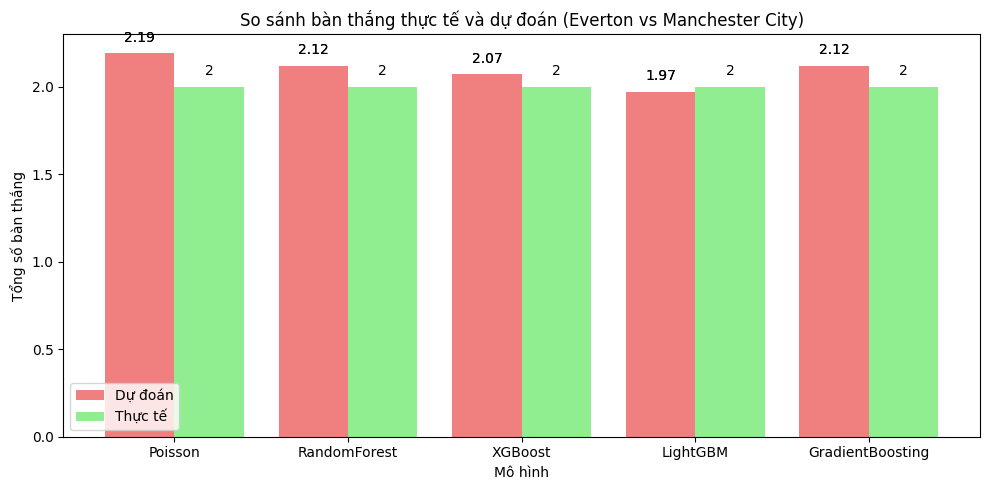

In [43]:

# Dữ liệu
models = ['Poisson', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting']
mae_test = [0.84, 0.17, 0.15, 0.18, 0.15]  # MAE (test)
actual_goals = 2
predicted_goals = [2.19, 2.12, 2.07, 1.97, 2.12]  # Dự đoán

# Biểu đồ 1: So sánh MAE (test) của 5 mô hình
plt.figure(figsize=(8, 5))
plt.bar(models, mae_test, color='skyblue')
plt.title('So sánh MAE (test) của 5 mô hình')
plt.xlabel('Mô hình')
plt.ylabel('MAE (test)')
plt.ylim(0, 1.0)
for i, v in enumerate(mae_test):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Biểu đồ 2: So sánh bàn thắng thực tế và dự đoán
plt.figure(figsize=(10, 5))
x = range(len(models))
plt.bar(x, predicted_goals, width=0.4, label='Dự đoán', color='lightcoral', align='center')
plt.bar([i + 0.4 for i in x], [actual_goals] * len(models), width=0.4, label='Thực tế', color='lightgreen', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.title('So sánh bàn thắng thực tế và dự đoán (Everton vs Manchester City)')
plt.xlabel('Mô hình')
plt.ylabel('Tổng số bàn thắng')
plt.legend()
for i, v in enumerate(predicted_goals):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(predicted_goals):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')
    plt.text(i + 0.4, actual_goals + 0.05, f'{actual_goals}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Nhận xét
    - MAE (test): Poisson Regressor cao nhất (0.84), kém nhất. XGBoost và GradientBoosting thấp nhất (0.15), tốt nhất, tiếp theo là RandomForest (0.17) và LightGBM (0.18).

    - Dự đoán (Everton vs Manchester City): Thực tế 2 bàn. LightGBM chính xác nhất (1.97, sai số 0.03), XGBoost (2.07, sai số 0.07), Poisson cao nhất (2.19, sai số 0.19). RandomForest và GradientBoosting cùng 2.12 (sai số 0.12).

# Lý do
    - Poisson Regressor: MAE cao do mô hình tuyến tính, không nắm bắt mối quan hệ phi tuyến. Dự đoán tốt trong trường hợp này do dữ liệu phù hợp giả định Poisson.
    
    - Tree-based models (XGBoost, LightGBM, RandomForest, GradientBoosting): MAE thấp, dự đoán tốt nhờ học mối quan hệ phi tuyến và tương tác đặc trưng. LightGBM chính xác nhất do tối ưu leaf-wise và xử lý đặc trưng tốt.

# Tối ưu hóa lại 5 mô hình rồi đánh giá lại

    Cách:

    - chạy lại 5 mô hình

    - sử dụng GridCV để tìm tham số tối ưu nhất

    - Lưu ý: CHỌN 2-3 THAM SỐ TỐI ĐA 3 ĐỂ GIẢM THỜI GIAN HUẤN LUYỆN, có thể đưa thêm để tìm ra tham số chính xác hơn
    
    - dùng GridCV có cross validation k-fold để kiểm tra underfitting và underfitting

    - Việc lựa chọn tham số là dựa trên thử nghiệm từ huấn luyện mô hình ở cell trước và có tinh chỉnh,có thể điều chỉnh nếu muốn

In [44]:
#poisson regressor
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Khởi tạo mô hình và lưới tham số
poisson_model = PoissonRegressor()
poisson_params = {
    'alpha': [0.01, 0.1],
    'max_iter': [500, 1000, 2000]
}

# Vector đặc trưng cho Everton vs Manchester City
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
X_input = X_input[X_train.columns]

# Tối ưu hóa bằng GridSearchCV
print("Tối ưu hóa Poisson...")
grid_search_poisson = GridSearchCV(poisson_model, poisson_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_poisson.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_poisson = grid_search_poisson.best_estimator_
print(f"Tham số tốt nhất cho Poisson: {grid_search_poisson.best_params_}")

# Đánh giá trên tập kiểm tra
y_test_pred_poisson = best_poisson.predict(X_test)
mae_test_poisson = mean_absolute_error(y_test, y_test_pred_poisson)

# Dự đoán cho Everton vs Manchester City
actual = 2
prediction_poisson = best_poisson.predict(X_input)

# In kết quả
print("\nPoisson Results (sau tối ưu):")
print(f"MAE (test): {mae_test_poisson:.2f}")
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction_poisson[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE (dự đoán): {mean_absolute_error([actual], prediction_poisson):.2f}")

# Giải phóng bộ nhớ
del grid_search_poisson
import gc
gc.collect()

Tối ưu hóa Poisson...
Tham số tốt nhất cho Poisson: {'alpha': 0.01, 'max_iter': 1000}

Poisson Results (sau tối ưu):
MAE (test): 0.77
Dự đoán tổng số bàn thắng (Everton vs Manchester City): 1.98
Tổng số bàn thắng thực tế: 2
MAE (dự đoán): 0.02


25971

In [ ]:
import joblib
import os

# Tạo thư mục models nếu chưa có
os.makedirs("models", exist_ok=True)

# Lưu từng mô hình đã huấn luyện
joblib.dump(best_poisson, "models/ps.pkl")   
#đổi tên lại nha

['models/poission.pkl']

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Khởi tạo mô hình và lưới tham số
rf_model = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, ]
}

# Vector đặc trưng cho Everton vs Manchester City
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
X_input = X_input[X_train.columns]

# Tối ưu hóa bằng GridSearchCV
print("Tối ưu hóa RandomForest...")
grid_search_rf = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_rf = grid_search_rf.best_estimator_
print(f"Tham số tốt nhất cho RandomForest: {grid_search_rf.best_params_}")

# Đánh giá trên tập kiểm tra
y_test_pred_rf = best_rf.predict(X_test)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Dự đoán cho Everton vs Manchester City
actual = 2
prediction_rf = best_rf.predict(X_input)

# In kết quả
print("\nRandomForest Results (sau tối ưu):")
print(f"MAE (test): {mae_test_rf:.2f}")
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction_rf[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE (dự đoán): {mean_absolute_error([actual], prediction_rf):.2f}")

# Giải phóng bộ nhớ
del grid_search_rf
import gc
gc.collect()

Tối ưu hóa RandomForest...
Tham số tốt nhất cho RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 400}

RandomForest Results (sau tối ưu):
MAE (test): 0.17
Dự đoán tổng số bàn thắng (Everton vs Manchester City): 2.12
Tổng số bàn thắng thực tế: 2
MAE (dự đoán): 0.12


93

In [47]:
import joblib
import os

# Tạo thư mục models nếu chưa có
os.makedirs("models", exist_ok=True)

# Lưu từng mô hình đã huấn luyện
joblib.dump(best_rf, "models/rf.pkl")   

['models/rf.pkl']

In [48]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Khởi tạo mô hình và lưới tham số
xgb_model = XGBRegressor(random_state=42)
xgb_params = {
    'n_estimators': [300, 350, 400],
    'max_depth': [6, 8, 10],
    'learning_rate': [ 0.05, 0.1],
    'reg_alpha': [0.1, 0.2],
    'reg_lambda': [0.1, 0.2]
}

# Vector đặc trưng cho Everton vs Manchester City
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
X_input = X_input[X_train.columns]

# Tối ưu hóa bằng GridSearchCV
print("Tối ưu hóa XGBoost...")
grid_search_xgb = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_xgb = grid_search_xgb.best_estimator_
print(f"Tham số tốt nhất cho XGBoost: {grid_search_xgb.best_params_}")

# Đánh giá trên tập kiểm tra
y_test_pred_xgb = best_xgb.predict(X_test)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

# Dự đoán cho Everton vs Manchester City
actual = 2
prediction_xgb = best_xgb.predict(X_input)

# In kết quả
print("\nXGBoost Results (sau tối ưu):")
print(f"MAE (test): {mae_test_xgb:.2f}")
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction_xgb[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE (dự đoán): {mean_absolute_error([actual], prediction_xgb):.2f}")

# Giải phóng bộ nhớ
del grid_search_xgb
import gc
gc.collect()

Tối ưu hóa XGBoost...
Tham số tốt nhất cho XGBoost: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 0.1}

XGBoost Results (sau tối ưu):
MAE (test): 0.15
Dự đoán tổng số bàn thắng (Everton vs Manchester City): 2.07
Tổng số bàn thắng thực tế: 2
MAE (dự đoán): 0.07


93

In [49]:
import joblib
import os

# Tạo thư mục models nếu chưa có
os.makedirs("models", exist_ok=True)

# Lưu từng mô hình đã huấn luyện
joblib.dump(best_xgb, "models/xgb.pkl")   

['models/xgb.pkl']

In [50]:

# Khởi tạo mô hình và lưới tham số
lgbm_model = LGBMRegressor(random_state=42)
lgbm_params = {
    'n_estimators': [300, 350, 400],
    'max_depth': [6, 8, 10],
    'learning_rate': [ 0.05, 0.1],
    'reg_alpha': [0.1, 0.2],
    'reg_lambda': [0.1, 0.2],
    'min_data_in_leaf': [20, 50]
}

# Vector đặc trưng cho Everton vs Manchester City
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
X_input = X_input[X_train.columns]

# Tối ưu hóa bằng GridSearchCV
print("Tối ưu hóa LightGBM...")
grid_search_lgbm = GridSearchCV(lgbm_model, lgbm_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_lgbm = grid_search_lgbm.best_estimator_
print(f"Tham số tốt nhất cho LightGBM: {grid_search_lgbm.best_params_}")

# Đánh giá trên tập kiểm tra
y_test_pred_lgbm = best_lgbm.predict(X_test)
mae_test_lgbm = mean_absolute_error(y_test, y_test_pred_lgbm)

# Dự đoán cho Everton vs Manchester City
actual = 2
prediction_lgbm = best_lgbm.predict(X_input)

# In kết quả
print("\nLightGBM Results (sau tối ưu):")
print(f"MAE (test): {mae_test_lgbm:.2f}")
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction_lgbm[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE (dự đoán): {mean_absolute_error([actual], prediction_lgbm):.2f}")

# Giải phóng bộ nhớ
del grid_search_lgbm
import gc
gc.collect()

Tối ưu hóa LightGBM...
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 998
[LightGBM] [Info] Number of data points in the train set: 16544, number of used features: 13
[LightGBM] [Info] Start training from score 2.629715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Tham số tốt nhất cho LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'min_data_in_leaf': 20, 'n_estimators': 400, 'reg_alpha': 0.2, 'reg_lambda': 0.2}
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is s

83

In [51]:
import joblib
import os

# Tạo thư mục models nếu chưa có
os.makedirs("models", exist_ok=True)

# Lưu từng mô hình đã huấn luyện
joblib.dump(best_lgbm, "models/lgbm.pkl")   

['models/lgbm.pkl']

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Khởi tạo mô hình và lưới tham số
gb_model = GradientBoostingRegressor(random_state=42)
gb_params = {
    'n_estimators': [300, 350, 400],
    'max_depth': [6, 8, 10],
    'learning_rate': [ 0.05, 0.1]
}

# Vector đặc trưng cho Everton vs Manchester City
features = [0.3000, 0.3333, 0.3333, 0.2000, 1.0, 2.6, 1.3, 2.2, 17, 27, 44, 5.8, 5.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']
X_input = pd.DataFrame([features], columns=columns)
X_input = X_input[X_train.columns]

# Tối ưu hóa bằng GridSearchCV
print("Tối ưu hóa GradientBoosting...")
grid_search_gb = GridSearchCV(gb_model, gb_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_gb = grid_search_gb.best_estimator_
print(f"Tham số tốt nhất cho GradientBoosting: {grid_search_gb.best_params_}")

# Đánh giá trên tập kiểm tra
y_test_pred_gb = best_gb.predict(X_test)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)

# Dự đoán cho Everton vs Manchester City
actual = 2
prediction_gb = best_gb.predict(X_input)

# In kết quả
print("\nGradientBoosting Results (sau tối ưu):")
print(f"MAE (test): {mae_test_gb:.2f}")
print(f"Dự đoán tổng số bàn thắng (Everton vs Manchester City): {prediction_gb[0]:.2f}")
print(f"Tổng số bàn thắng thực tế: {actual}")
print(f"MAE (dự đoán): {mean_absolute_error([actual], prediction_gb):.2f}")

# Giải phóng bộ nhớ
del grid_search_gb
import gc
gc.collect()  

Tối ưu hóa GradientBoosting...
Tham số tốt nhất cho GradientBoosting: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 400}

GradientBoosting Results (sau tối ưu):
MAE (test): 0.14
Dự đoán tổng số bàn thắng (Everton vs Manchester City): 2.25
Tổng số bàn thắng thực tế: 2
MAE (dự đoán): 0.25


27

In [ ]:
import joblib
joblib.dump(best_gb, "models/gradient_boosting.pkl")


['models/gradient_boosting.pkl']

từ giờ không cần chạy lại hết mô hình nữa
đã lưu file models

In [20]:
import joblib

rf_model = joblib.load("models/rf.pkl")
gb_model = joblib.load("models/gradient_boosting.pkl")
lgb_model = joblib.load("models/lgbm.pkl")
ps_model = joblib.load("models/ps.pkl")
xgb_model = joblib.load("models/xgb.pkl")

trực quan hóa lại với code từ trực quan mô hình chưa tối ưu, thay đổi chút ít lại

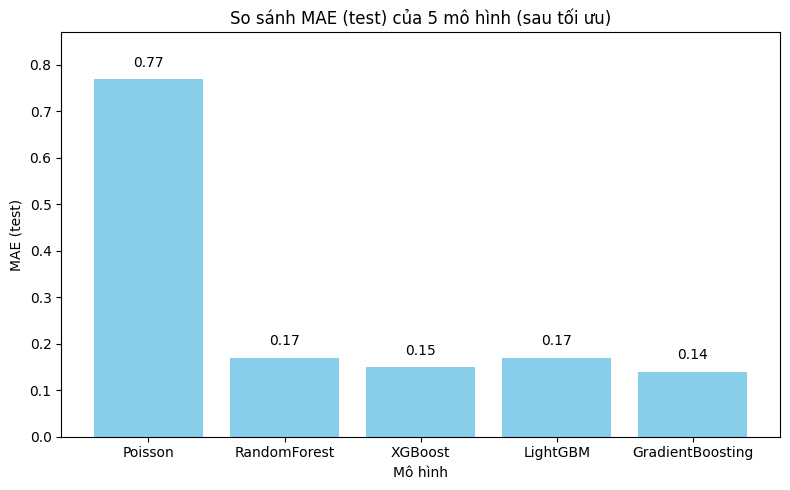

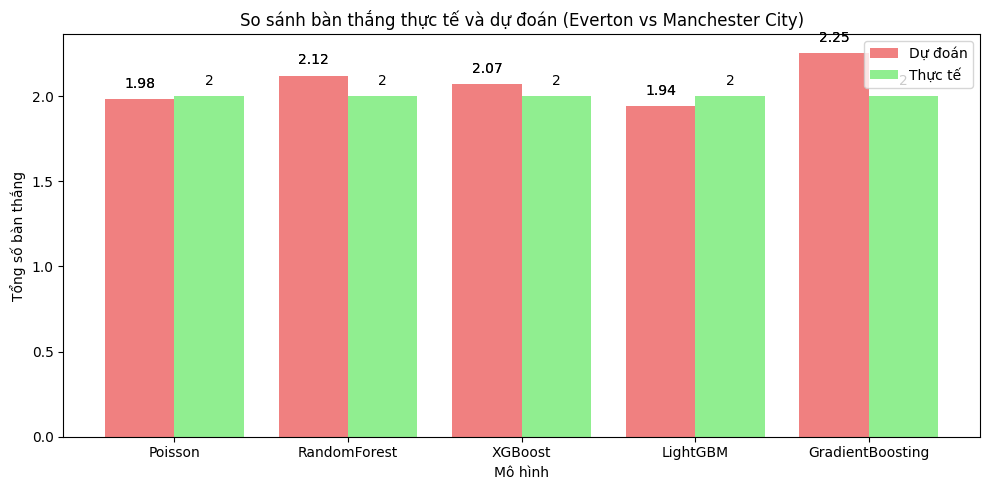

In [55]:
models = ['Poisson', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting']
mae_test = [0.77, 0.17, 0.15, 0.17, 0.14]  # MAE (test)
predicted_goals = [1.98, 2.12, 2.07, 1.94, 2.25]  # Dự đoán sau tối ưu
actual_goals = 2  # Thực tế

# Biểu đồ 1: So sánh MAE (test) của 5 mô hình
plt.figure(figsize=(8, 5))
plt.bar(models, mae_test, color='skyblue')
plt.title('So sánh MAE (test) của 5 mô hình (sau tối ưu)')
plt.xlabel('Mô hình')
plt.ylabel('MAE (test)')
plt.ylim(0, max(mae_test) + 0.1)
for i, v in enumerate(mae_test):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Biểu đồ 2: So sánh bàn thắng thực tế và dự đoán
plt.figure(figsize=(10, 5))
x = range(len(models))
plt.bar(x, predicted_goals, width=0.4, label='Dự đoán', color='lightcoral', align='center')
plt.bar([i + 0.4 for i in x], [actual_goals] * len(models), width=0.4, label='Thực tế', color='lightgreen', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.title('So sánh bàn thắng thực tế và dự đoán (Everton vs Manchester City)')
plt.xlabel('Mô hình')
plt.ylabel('Tổng số bàn thắng')
plt.legend()
for i, v in enumerate(predicted_goals):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(predicted_goals):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')
    plt.text(i + 0.4, actual_goals + 0.05, f'{actual_goals}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Nhận xét về hiệu suất mô hình

## MAE Test
- **Poisson**: giảm từ 0.84 còn 0.77
- **Random Forest (RF)**: không giảm
- **XGBoost (XGB)**: không giảm
- **LightGBM (LGBM)**: giảm từ 0.18 còn 0.17
- **Gradient Boosting (GBoosting)**: giảm từ 0.15 xuống 0.14

## MAE Bàn Thắng Dự Đoán (thực tế 2 bàn)
- **Poisson**: từ 0.12 xuống 0.02
- **RF**: không giảm
- **XGB**: không giảm
- **LGBM**: từ 0.03 lên 0.06
- **GBoosting**: từ 0.12 lên 0.25

## Lý Do

###  1. Poisson Regression
- **MAE test**: giảm từ 0.84 còn 0.77
- **MAE dự đoán thực tế**: giảm mạnh từ 0.12 còn 0.02
- **Giải thích**: 
  - Poisson Regression là mô hình tuyến tính, ít tham số. Tối ưu giúp tập trung vào trung bình tổng bàn thắng, tránh nhiễu từ các trận có tổng bàn thắng bất thường.
  - Giảm MAE test và ít overfit giúp dự đoán điểm cụ thể sát hơn.

###  2. Random Forest
- **MAE test**: không giảm (0.17)
- **MAE dự đoán thực tế**: không thay đổi (0.12)
- **Giải thích**: 
  - Random Forest ổn định, ít overfitting nhờ trung bình nhiều cây. Nếu GridSearch không cải thiện tham số, kết quả giữ nguyên là bình thường.

###  3. XGBoost
- **MAE test**: không giảm (0.15)
- **MAE dự đoán thực tế**: không thay đổi (0.07)
- **Giải thích**: 
  - XGBoost mạnh với dữ liệu structured/tabular. Nếu tham số ban đầu tốt, tối ưu thêm không cải thiện đáng kể.

###  4. LightGBM
- **MAE test**: giảm từ 0.18 còn 0.17
- **MAE dự đoán thực tế**: tăng từ 0.03 lên 0.06
- **Giải thích**: 
  - Overfitting cục bộ: MAE test giảm nhưng không đảm bảo dự đoán đúng cho mọi điểm cụ thể. Tăng MAE dự đoán thực tế có thể do đánh giá thấp trận Everton vs Man City.

###  5. Gradient Boosting
- **MAE test**: giảm từ 0.15 còn 0.14
- **MAE dự đoán thực tế**: tăng mạnh từ 0.12 lên 0.25
- **Giải thích**: 
  - MAE test giảm nhưng dự đoán lệch xa cho trận cụ thể. Có thể do phân bổ trọng số khác hoặc tối ưu toàn cục nhưng hy sinh điểm cụ thể.

## Tổng kết nhận xét

| Mô hình   | MAE Test (↓ là tốt) | MAE Dự đoán (↓ là tốt) | Diễn giải |
|-----------|---------------------|------------------------|-----------|
| Poisson   | Giảm               | Giảm mạnh             | Dữ liệu đơn giản → tối ưu hiệu quả rõ ràng cả test và dự đoán thực tế |
| Random Forest | Không đổi       | Không đổi             | Đã gần tối ưu → tối ưu thêm không cải thiện |
| XGBoost   | Không đổi          | Không đổi             | Đã rất tốt từ đầu → tối ưu không thêm giá trị |
| LightGBM  | Giảm nhẹ           | Tăng nhẹ              | Có thể đang overfit hoặc sai ở điểm cụ thể |
| GBoosting | Giảm nhẹ           | Tăng mạnh             | Tối ưu toàn cục nhưng ảnh hưởng xấu đến điểm cụ thể (overfitting cục bộ) |

# KẾT LUẬN

## Giai đoạn trước và sau tối ưu

| Giai đoạn    | Mục tiêu                      | Mô hình nên chọn |
|--------------|-------------------------------|------------------|
| Trước tối ưu | Dự đoán sát thực tế           | LightGBM         |
| Trước tối ưu | Tổng thể tốt + thực tế ổn     | XGBoost          |
| Sau tối ưu   | Dự đoán trận thực tế tốt nhất | Poisson          |
| Sau tối ưu   | Tổng thể tốt, ổn định         | XGBoost          |

## SAU TỐI ƯU NÊN CHỌN MÔ HÌNH NÀO VÀO TRƯỜNG HỢP NÀO

| Mô hình          | Khi nào chọn?                                                   |
|------------------|-----------------------------------------------------------------|
| Poisson          | Dự đoán trận đơn thật sát, dữ liệu là biến đếm                  |
| XGBoost          | Cân bằng tốt, áp dụng rộng, triển khai lớn                      |
| LightGBM         | Cần tốc độ train nhanh, dữ liệu lớn, dự đoán khá                |
| Random Forest    | Dễ giải thích, dữ liệu nhiều nhiễu                               |
| GradientBoosting | Tổng thể tốt, nhưng cần kiểm tra lại nếu dùng để dự đoán trận cụ thể |

# Theo tôi, để chọn mô hình dự đoán một trận cụ thể thật chính xác(yêu cầu đưa ra của tôi và xét cả yếu tố tốc độ) thì chọn Poisson,lý do:
    - tuy MAE test cao nhất và cách xa nhóm 4 mô hình nhưng độ chính xác cao phù hợp để dự đoán 1 trận bất kỳ
    - VÌ VẬY, TÔI SẼ NÓI POISSON LÀ MÔ HÌNH TỐT NHẤT ĐỂ DỰ ĐOÁN CỤ THỂ MỘT TRẬN.
# còn nếu xét về MAE(TEST) thì chọn GradientBoosting

# giờ cả 5 mô hình đều có mae thực tế dưới 0.5, có cách nào để tối ưu từ các kết quả 5 mô hình đưa ra không?
1. Averaging (Trung bình dự đoán): quá dễ
2. Weighted Averaging (Trung bình có trọng số): hợp lý
3. Stacking (Huấn luyện mô hình meta): quá mất thời gian
lý do trung bình có trọng số hợp lý:
    Khi các mô hình không quá lệch nhau
    Khi bạn muốn một cách kết hợp nhanh, dễ hiểu
    Dữ liệu không quá lớn
## tác dụng:
    - tăng độ chính xác dự đoán
    - giảm overfitting, pha loãng đi
    - dùng trọng số để tận dụng các mô hình hiệu quả khi phân chia tỷ trọng
## cùng với tính toán, tôi sẽ trực quan luôn để so sánh mae các mô hình với mae của cách xử lý này

Trọng số cho từng mô hình:
GradientBoosting: 0.27
RandomForest: 0.22
XGBoost: 0.25
LightGBM: 0.22
Poisson: 0.05

Dự đoán trung bình có trọng số: 2.10
MAE (dự đoán tổng hợp): 0.10


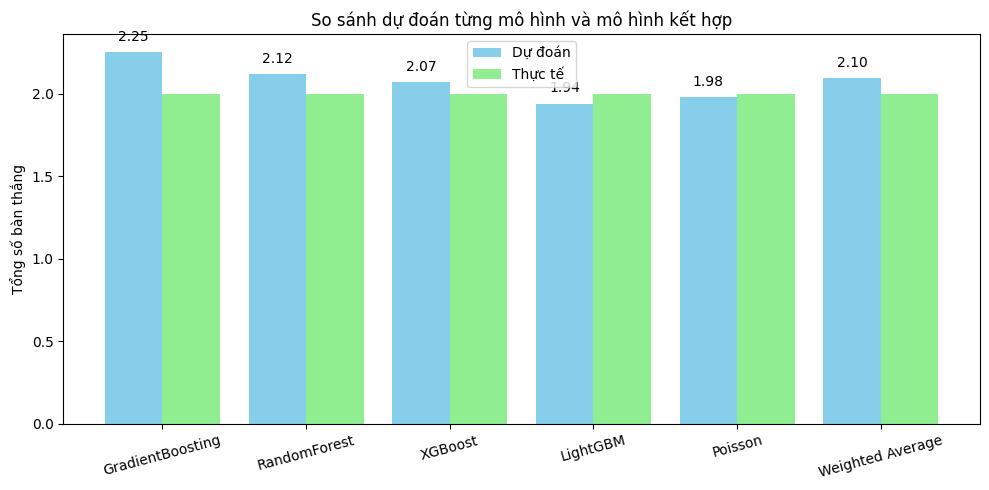

In [56]:

# Mô hình và dữ liệu
models = ['GradientBoosting', 'RandomForest', 'XGBoost', 'LightGBM', 'Poisson']
mae_test = np.array([0.14, 0.17, 0.15, 0.17, 0.77])
predictions = np.array([2.25, 2.12, 2.07, 1.94, 1.98])
actual_goals = 2

# Tính trọng số theo 1 / MAE
weights = 1 / mae_test
weights /= weights.sum()

# Dự đoán trung bình có trọng số
ensemble_pred = np.dot(predictions, weights)
ensemble_mae = abs(ensemble_pred - actual_goals)

# Hiển thị kết quả
print("Trọng số cho từng mô hình:")
for m, w in zip(models, weights):
    print(f"{m}: {w:.2f}")

print(f"\nDự đoán trung bình có trọng số: {ensemble_pred:.2f}")
print(f"MAE (dự đoán tổng hợp): {ensemble_mae:.2f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
x = range(len(models) + 1)
all_preds = list(predictions) + [ensemble_pred]
labels = models + ['Weighted Average']

plt.bar(x, all_preds, width=0.4, label='Dự đoán', color='skyblue')
plt.bar([i + 0.4 for i in x], [actual_goals] * (len(models) + 1), width=0.4, label='Thực tế', color='lightgreen')

plt.xticks([i + 0.2 for i in x], labels, rotation=15)
plt.title('So sánh dự đoán từng mô hình và mô hình kết hợp')
plt.ylabel('Tổng số bàn thắng')
plt.legend()

for i, v in enumerate(all_preds):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


# Muốn dự đoán riêng 1 mô hình: Poisson
# muốn lấy tỷ trọng, phân chia trọng số hợp lý: trung bình có trọng số

### Các công trình liên quan

- Joseph et al. (2018): Ứng dụng Random Forest và XGBoost để dự đoán kết quả bóng đá, độ chính xác đạt 70-80% với dữ liệu EPL.
- Hucaljuk et al.: Sử dụng mô hình Poisson và các thuật toán học máy để dự đoán tỷ số, tập trung vào các chỉ số thống kê trận đấu.
- Opta Sports, StatsBomb: Các công ty cung cấp dữ liệu bóng đá chuyên sâu, xây dựng hệ thống phân tích hiệu suất đội bóng, cầu thủ và dự đoán kết quả.
- DeepMind (Google): Ứng dụng deep learning vào phân tích chiến thuật và dự đoán kết quả bóng đá chuyên nghiệp.

Các nghiên cứu này cho thấy việc kết hợp nhiều nguồn dữ liệu và mô hình khác nhau giúp tăng độ chính xác dự đoán và mở rộng ứng dụng thực tiễn.

# Nhận xét và Đánh giá Tính Khả Thi

## Tính khả thi
Tính khả thi của việc áp dụng Machine Learning trong việc dự đoán số bàn thắng là khá cao, đặc biệt trong bối cảnh phân tích dữ liệu và dự đoán kết quả bóng đá trước trận đấu.

Các mô hình thể hiện khả năng học quy luật dữ liệu và có thể cung cấp những dự đoán hợp lý trong các tình huống thực tế, đặc biệt khi sử dụng dữ liệu đầu vào có tính chất thống kê và đặc trưng rõ ràng.

Mặc dù Poisson Regressor có MAE test cao hơn các mô hình khác, nhưng mô hình này lại hoạt động rất tốt khi dự đoán số bàn thắng thực tế trong trận đấu cụ thể, chứng tỏ rằng Poisson có thể hiệu quả trong các trường hợp có ít thay đổi, như các trận đấu có đội hình ổn định và ít biến động.

## Khả năng ứng dụng và Lưu ý
- **Phân tích dữ liệu thể thao**: Các mô hình Machine Learning có thể được ứng dụng hiệu quả trong việc phân tích các trận đấu trước khi diễn ra, cung cấp những dự đoán về tổng số bàn thắng, giúp các chuyên gia thể thao đưa ra các phân tích chi tiết hơn.

- **Dự đoán trong báo chí và truyền thông thể thao**: Các kết quả dự đoán có thể được sử dụng để tạo các bài phân tích, báo cáo hoặc dự đoán kết quả cho các chương trình thể thao.

- **Cá cược thể thao**: Tuy nhiên, độ chính xác của các mô hình ML hiện tại chưa đủ cao để đưa ra dự đoán chính xác tỉ số trận đấu, do các yếu tố ngẫu nhiên trong bóng đá vẫn có ảnh hưởng rất lớn. Vì vậy, cá cược dựa trên dự đoán của mô hình ML vẫn tiềm ẩn rủi ro cao và không khuyến khích nha.

## Kết luận
Tổng quan, việc sử dụng Machine Learning trong việc dự đoán số bàn thắng trong bóng đá là một công cụ hữu ích và khả thi, đặc biệt đối với việc phân tích và gợi ý xu hướng trước các trận đấu. Các mô hình như Gradient Boosting, XGBoost, và LightGBM có khả năng học tốt và cung cấp các dự đoán có tính chính xác cao trong môi trường thực tế. Vẫn có giới hạn khi áp dụng vào các ứng dụng yêu cầu độ chính xác tuyệt đối, như trong cá cược.

Do đó, mặc dù ML có thể không thay thế hoàn toàn yếu tố ngẫu nhiên và sự bất ngờ trong bóng đá, nhưng chúng vẫn là một công cụ rất hữu ích trong việc hỗ trợ phân tích và đưa ra các dự đoán dựa trên dữ liệu lịch sử.

# sau khi import mô hình lần lượt tên biến được gán là:
    -rf_model 
    -gb_model
    -lgb_model 
    -poisson_model 
    -xgb_model 
    thì thay thể line có tên model bằng tên model mong muốn
# ví dụ:poisson_model
# vecto có thể thay thế bằng vecto của bạn,tính toán theo hướng dẫn đã nhắc ở trên

# 1/ chạy cell 1
# 2/ chạy cell 116
# 3/ chạy cell dự doán

# LƯU Ý: CÓ THỂ SẼ BỊ LỖI VỀ THỨ TỰ CỘT

    - Feature names must match those that were passed during fit.
    - Feature names must be in the same order as they were in fit.
    GIẢI PHÁP: ĐẢM BẢO ĐÚNG THỨ TỰ CỘT, NẾU KHÔNG KÉT QUẢ BỊ LỚN BẤT NGỜ. hoặc có thể chỉnh sửa thứ tự cột.
    - ps.pkl not defined. đảm bảo đúng tên pkl

# LƯU Ý: CÓ THỂ SẼ BỊ LỖI VỀ VIỆC CHƯA CHUẨN HÓA DỮ LIỆU

    - Hiện tại, model trong notebook này được train trên dữ liệu **chưa chuẩn hóa bằng StandardScaler**. Trong quá trình kiểm thử, model vẫn cho kết quả dự đoán hợp lý và không gặp lỗi. Tuy nhiên, điều này có thể khác trên máy hoặc môi trường của người dùng khác, đặc biệt nếu dữ liệu đầu vào có phân phối khác biệt hoặc giá trị lớn/nhỏ bất thường.

    **Khuyến nghị:**
    - Nếu bạn gặp lỗi hoặc kết quả dự đoán bất thường, hãy thử chuẩn hóa dữ liệu đầu vào bằng StandardScaler trước khi đưa vào model.
    - Để đảm bảo tính ổn định và khả chuyển của mô hình, tốt nhất nên thống nhất quy trình xử lý dữ liệu (chuẩn hóa hoặc không chuẩn hóa) từ bước train đến khi dự đoán thực tế.
    - Nếu bạn cần sử dụng StandardScaler, hãy fit scaler trên dữ liệu train gốc và sử dụng lại scaler này cho mọi dữ liệu mới.

    **Tóm lại:**  
Dù model hiện tại không gặp lỗi chuẩn hóa, nhưng bạn cần kiểm tra kỹ khi áp dụng trên dữ liệu hoặc môi trường khác để tránh sai lệch kết quả.

    

# Nâng cao:
    -có thể thêm cột mạnh thay thế các cột khác để tăng độ hiệu quả
    -thêm hàm như tối ưu tham số, hàm so sánh hiệu suất của tất cả mô hình dược tính toán để tăng hiệu suất làm việc cùng như tổng quan hơn
    -thêm dữ liệu của các giải khác vào để tăng tính đa dạng về dữ liệu, nhất là các trận có nhiều bàn thắng - thứ mô hình đang chưa thật sự mạnh

In [65]:

#brighton newvastle
# Input theo thứ tự TỰ CHỌN của bạn
features = [0.15, 0.10, 0.15, 0.10, 1.0, 1.8, 1.0, 1.2, 14, 16, 32, 5.0, 6.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']

# Tạo DataFrame với thứ tự cột như bạn muốn
custom_df = pd.DataFrame([features], columns=columns)

# Sắp xếp lại đúng thứ tự mà model yêu cầu
input_df = custom_df[lgb_model.feature_names_in_]

# Dự đoán
predicted_goals = lgb_model.predict(input_df)
print("Predicted goals:", round(predicted_goals[0], 2))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Predicted goals: 1.63


test thử championship

In [ ]:

#conventry và middlesbrough
# Input theo thứ tự TỰ CHỌN của bạn
features = [0.15, 0.10, 0.15, 0.10, 1.0, 0.6, 1.0, 1.2, 14, 16, 32, 5.0, 6.0]
columns = ['H_Shot_Efficiency', 'A_Shot_Efficiency', 'H_Goal_Conversion', 'A_Goal_Conversion',
           'H_Avg_Goals_Last5', 'A_Avg_Goals_Last5', 'Expected_Goals_Home', 'Expected_Goals_Away',
           'H_Attack_Intensity', 'A_Attack_Intensity', 'Match_Intensity', 'H_Avg_Corners_Last5',
           'A_Avg_Corners_Last5']

# Tạo DataFrame với thứ tự cột như bạn muốn
custom_df = pd.DataFrame([features], columns=columns)

# Sắp xếp lại đúng thứ tự mà model yêu cầu
input_df = custom_df[lgb_model.feature_names_in_]

# Dự đoán
predicted_goals = lgb_model.predict(input_df)
print("Predicted goals:", round(predicted_goals[0], 2))
#kết quả là 2-0 . hợp lý

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Predicted goals: 1.61


## đoạn này là đoạn code để dự đoán số bàn thắng của trận đấu giữa conventry và middlesbrough
## có thể copy đoạn code trên rồi thay bằng vector của trận đấu mà bạn muốn dự đoán

# bổ sung(test thực tế)
#### Ví dụ thực tế về trận đấu ngoại lệ

Trong quá trình kiểm thử, đã xuất hiện các trận đấu như MU vs Brentford với tổng số bàn thắng lên tới 7 bàn. Đây là trường hợp ngoại lệ vì:

- Dữ liệu EPL và Championship chủ yếu tập trung vào các trận có tổng bàn thắng thấp đến trung bình, rất hiếm khi xuất hiện các trận có tổng bàn thắng cao như vậy.
- Mô hình có xu hướng “sợ” hoặc đánh giá thấp xác suất xảy ra những trận đấu này, dẫn đến dự đoán bị lệch nhiều so với thực tế.

Điều này cho thấy, việc xử lý và nhận diện các trận ngoại lệ là rất cần thiết. Ngoài ra, có thể cân nhắc:
- Phân tích riêng các trận có tổng bàn thắng cao để hiểu rõ hơn về nguyên nhân (ví dụ: đội hình dự bị, thế trận mở, yếu tố tâm lý...).
- Bổ sung các đặc trưng hoặc thuật toán phù hợp để mô hình không bị “quá bảo thủ” với các trường hợp hiếm gặp nhưng quan trọng này.